In [1]:
import matplotlib.pyplot as plt
import matplotlib.artist as art
import numpy as np
from pylab import imshow,show
from scipy import signal
from scipy import integrate as int

### Exercise 7.1: FT of Simple Functions

Write programs to calculate the coefficients of DFT's for N = 1000 (evenly spaced points) and plot their amplitudes:

a) single cycle of square wave with Amplitude = 1

b) sawtooth wave $y_n = n$

c) modulated sine wave: $y_n = sin(\pi n/N)sin(20\pi n/N)$

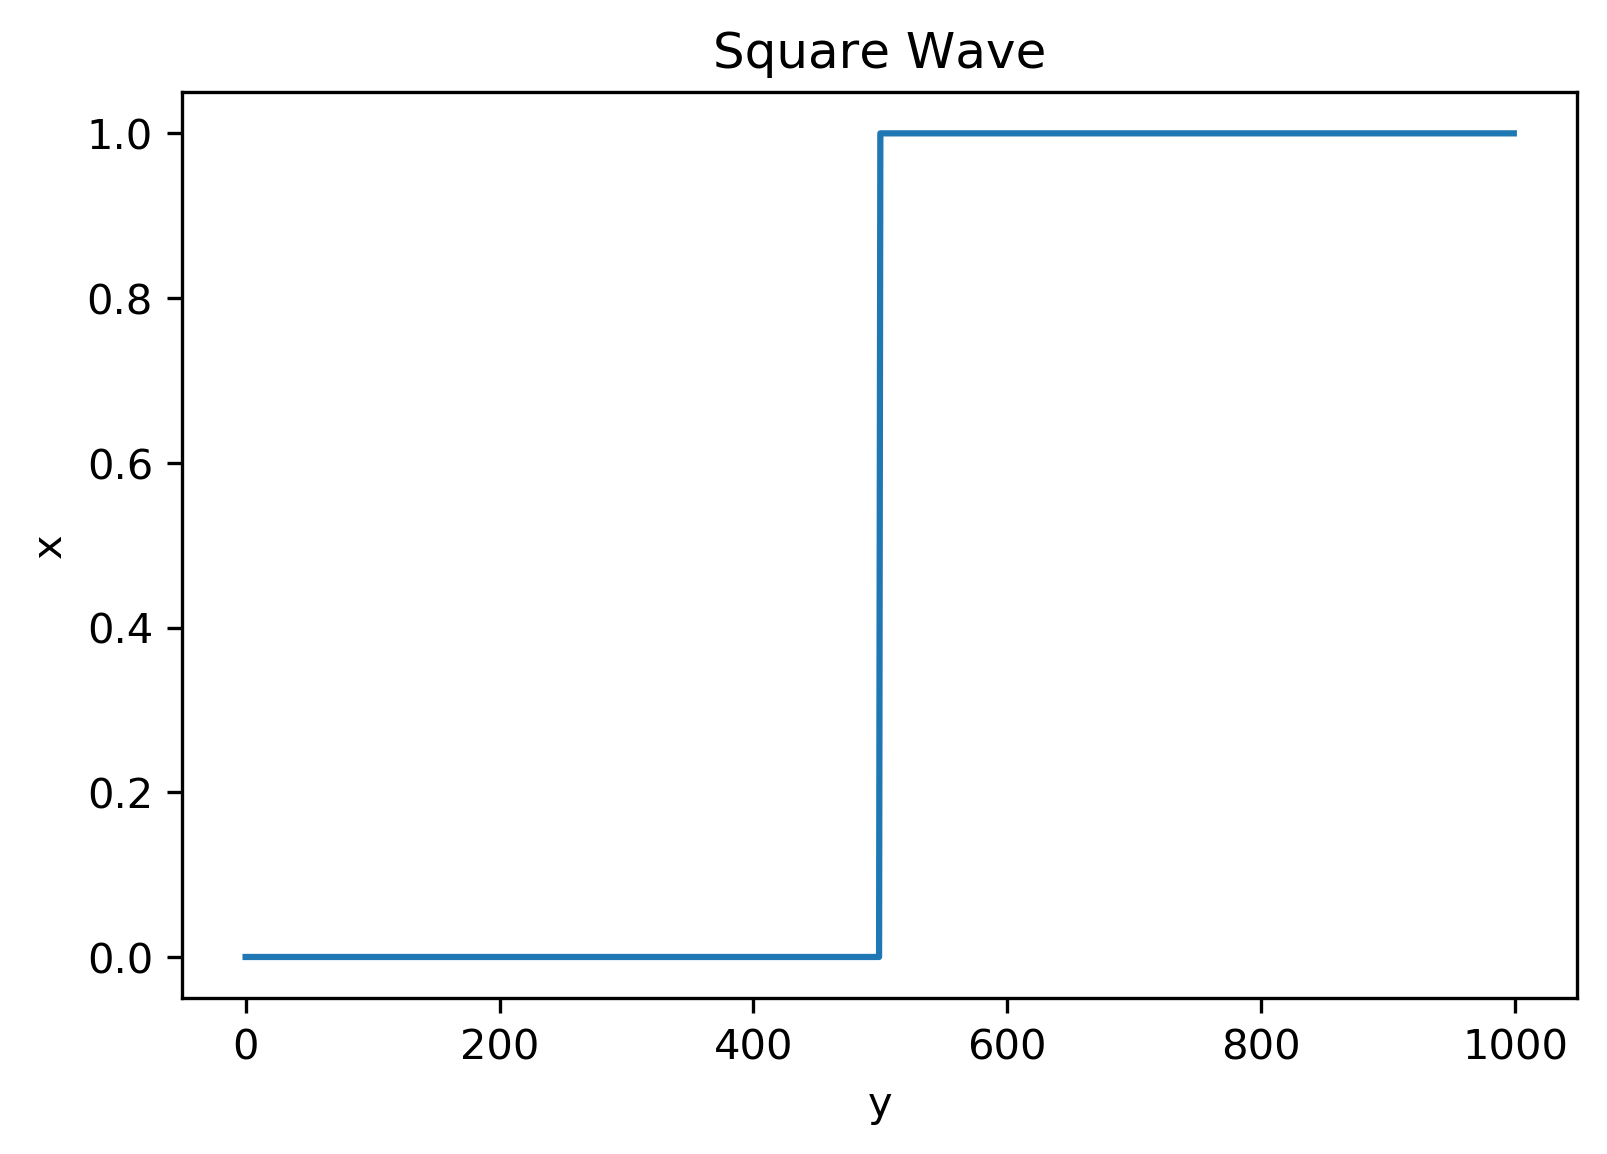

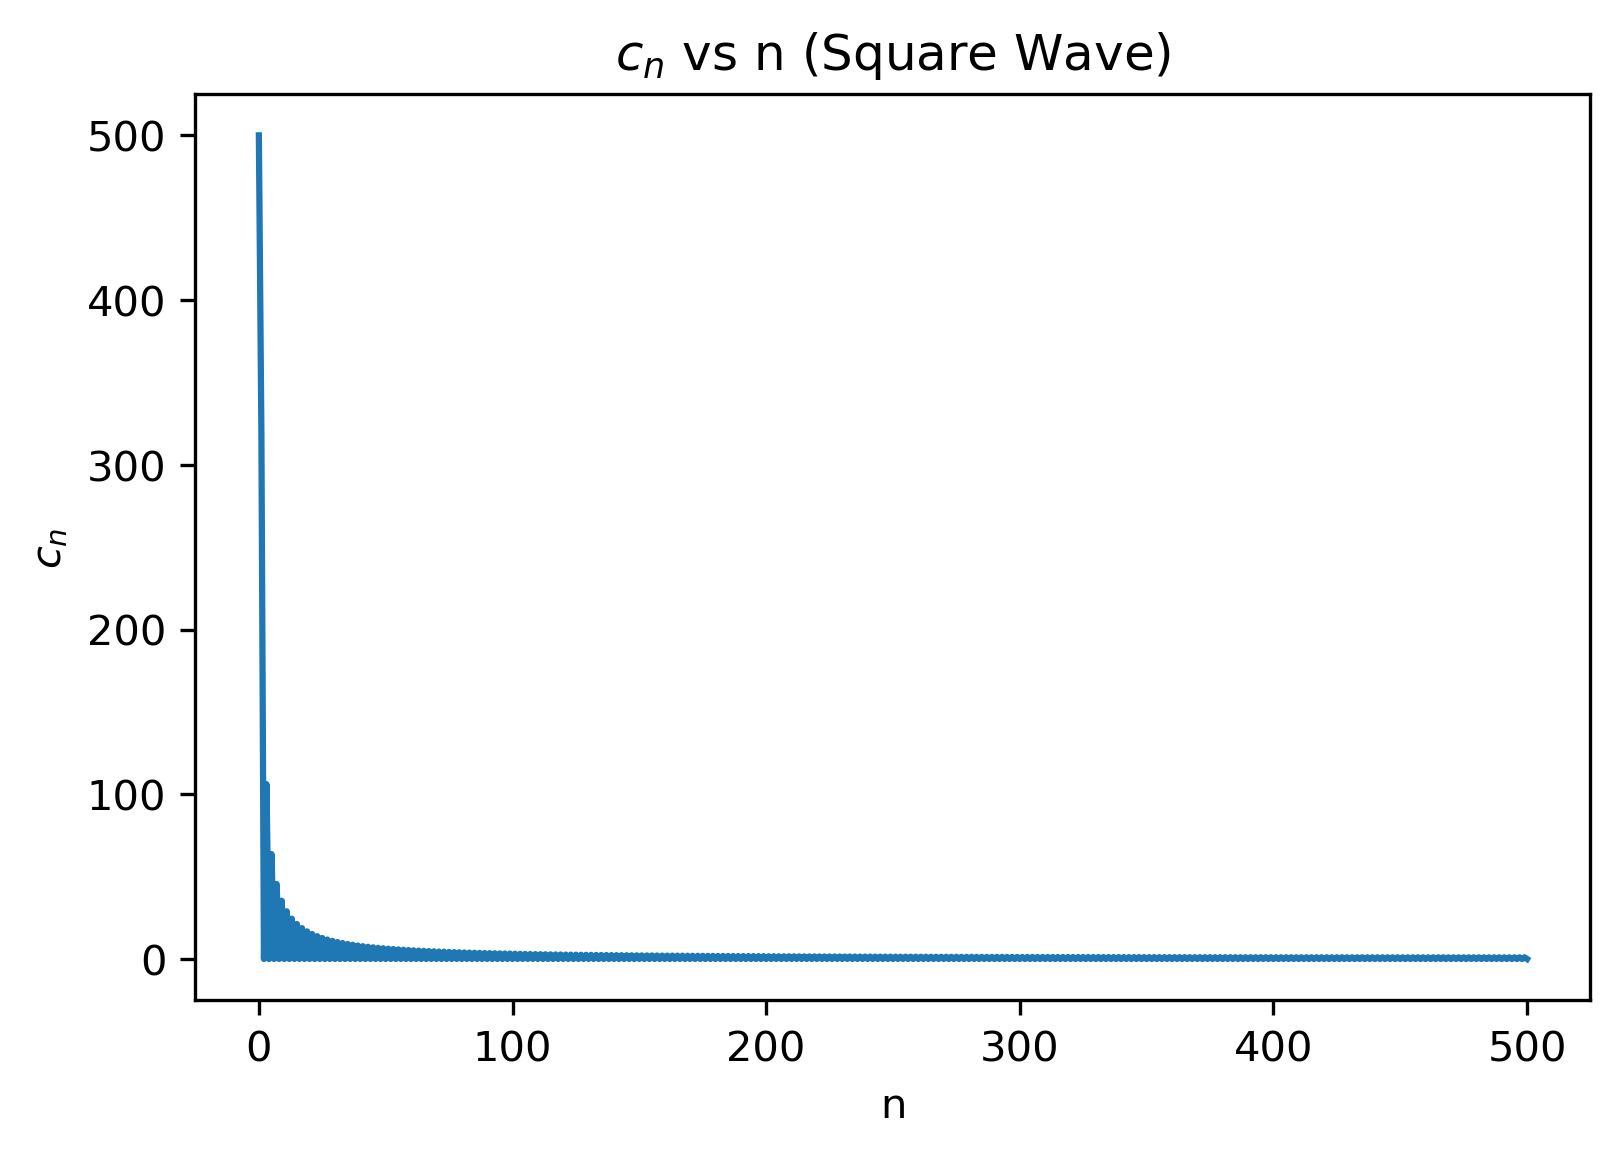

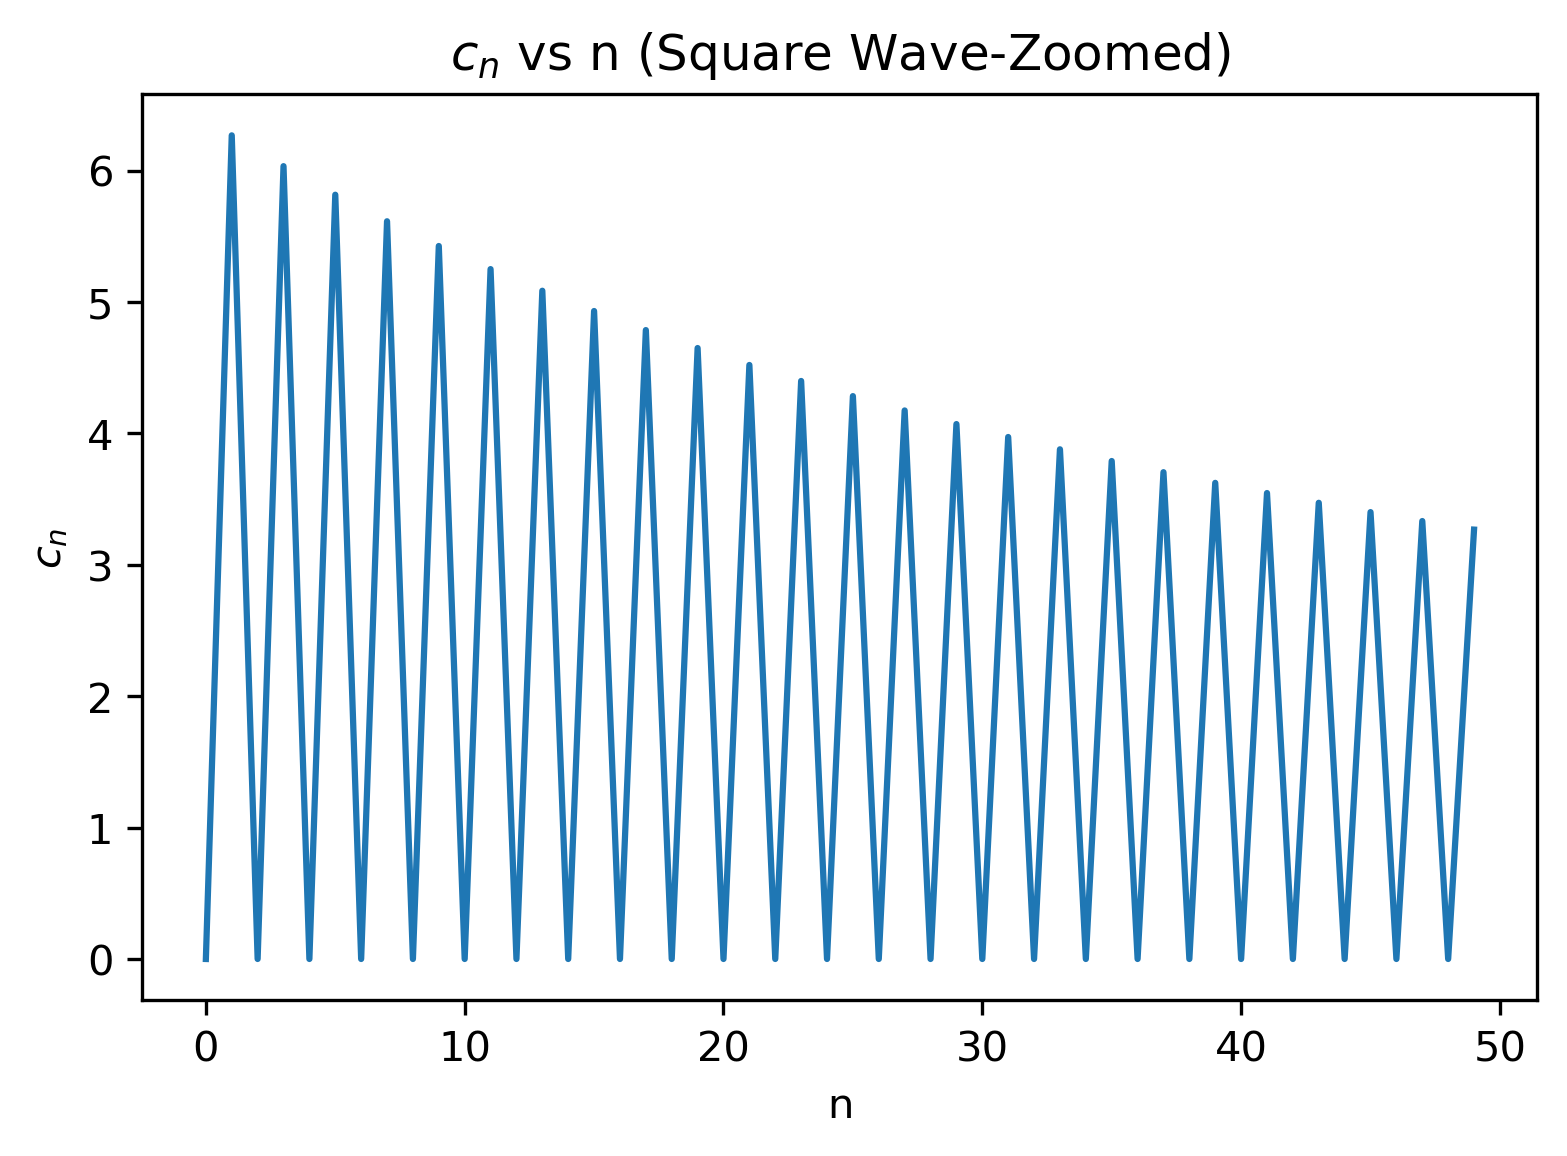

In [2]:
### PART A

N = 1000

# Create square wave array
y = np.zeros(N)
for i in range(500,N):
    y[i] = 1

# Take FT and plot
Y = np.fft.rfft(y)

plt.figure(dpi=300)
plt.plot(y)
plt.title("Square Wave")
plt.xlabel("y")
plt.ylabel("x")
plt.show()

plt.figure(dpi=300)
plt.plot(abs(Y))
plt.title("$c_n$ vs n (Square Wave)")
plt.xlabel("n")
plt.ylabel("$c_n$")
plt.show()

plt.figure(dpi=300)
plt.plot(abs(Y[50:100]))
plt.title("$c_n$ vs n (Square Wave-Zoomed)")
plt.xlabel("n")
plt.ylabel("$c_n$")
plt.show()

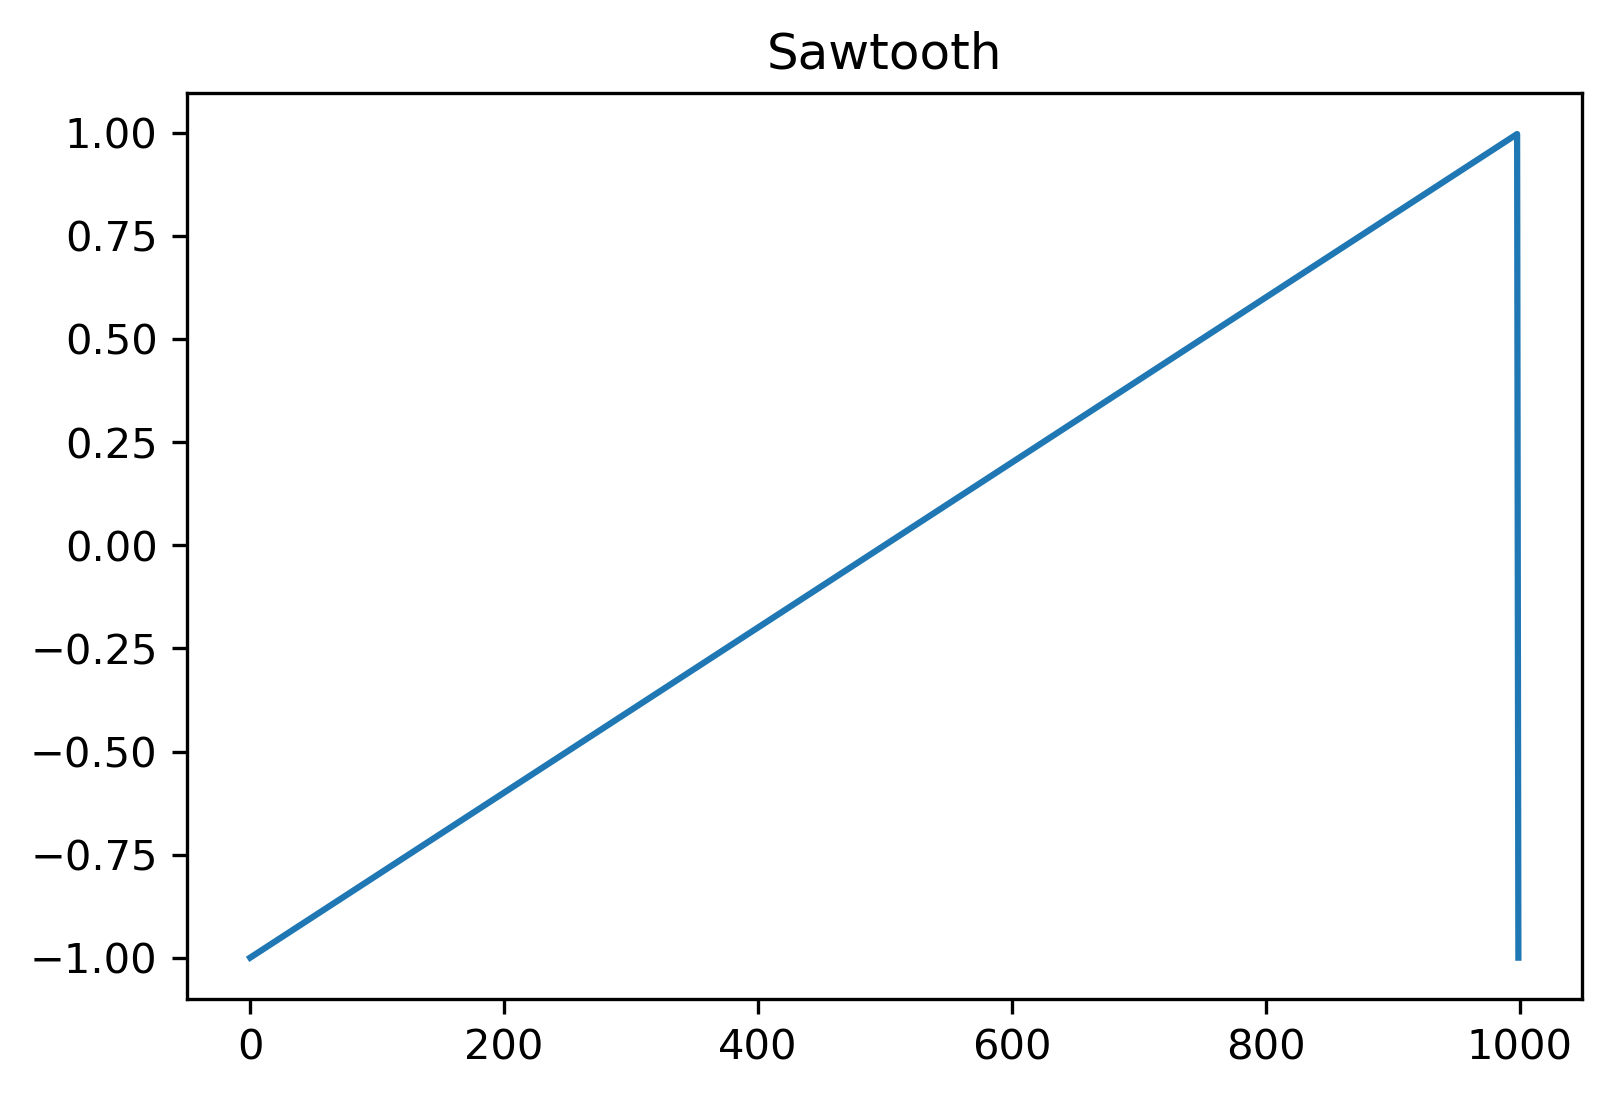

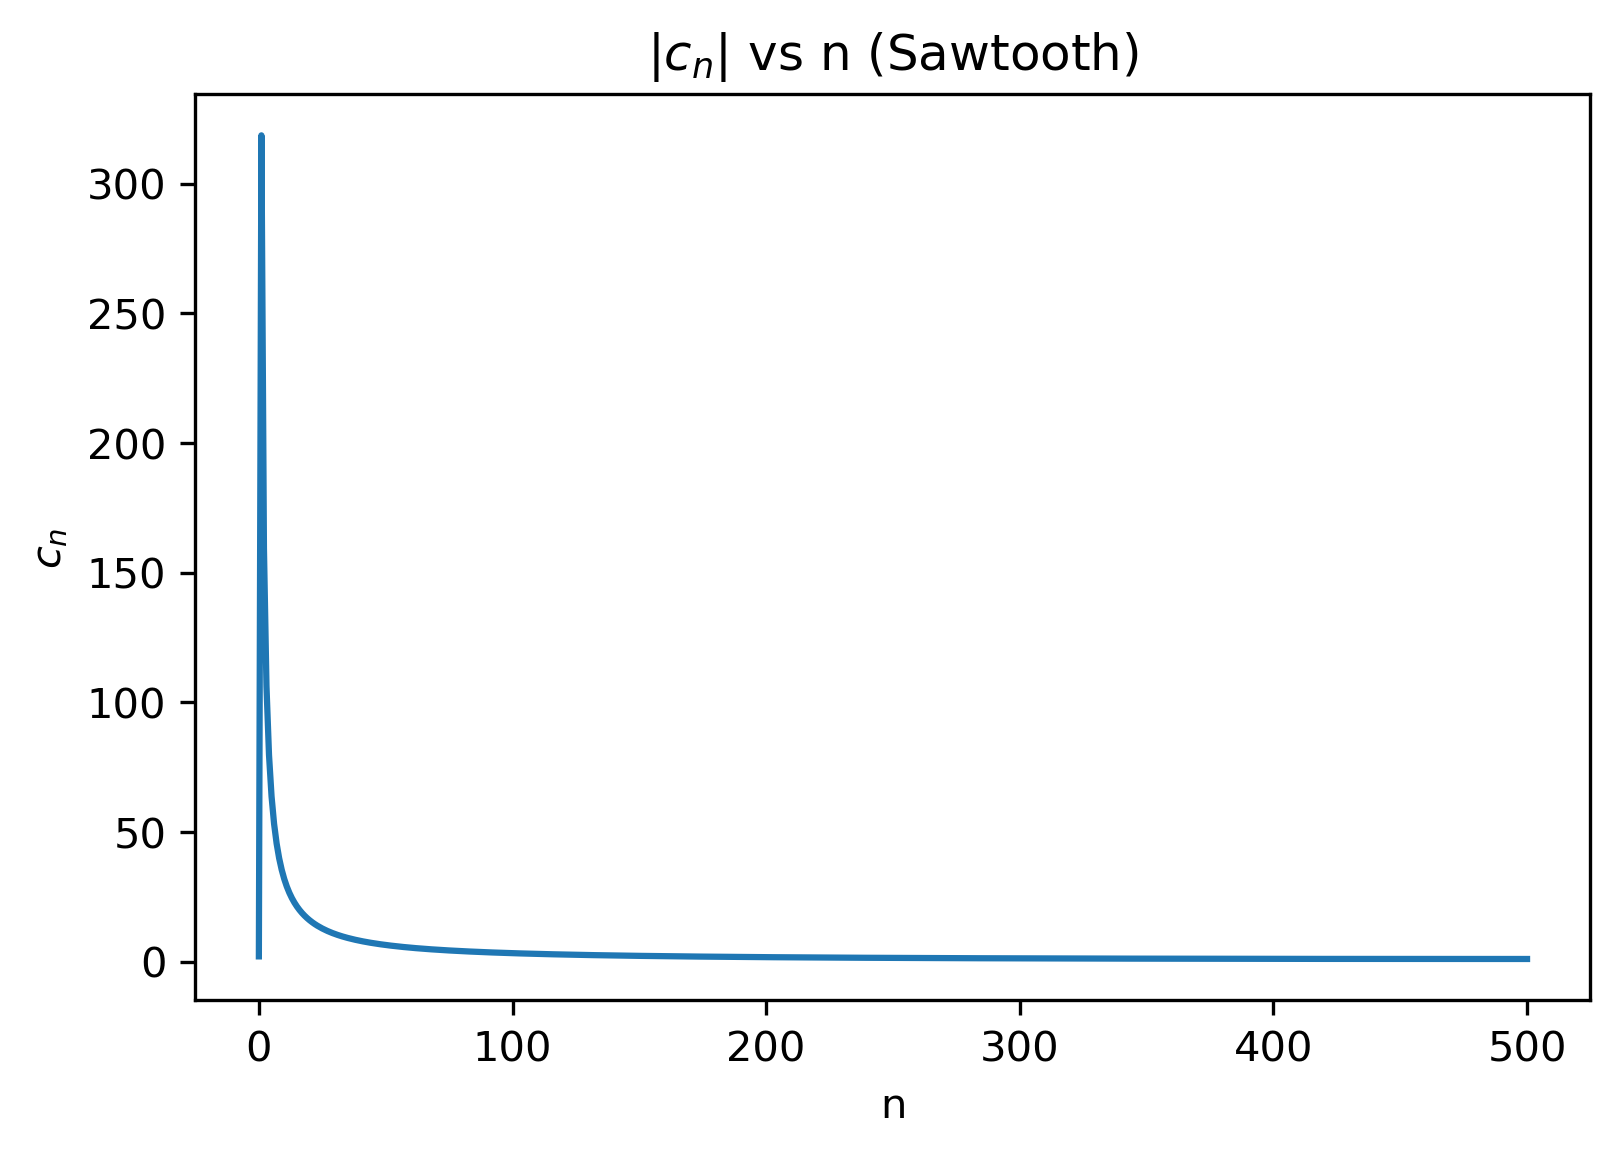

In [3]:
### PART B - Sawtooth
y = []
x = np.linspace(0,1,N)

# Create sawtooth array and plot
for i in x:
    y.append(signal.sawtooth(2*np.pi*i))

plt.figure(dpi=300)
plt.plot(y)
plt.title("Sawtooth")
plt.show()

# Take sawtooth FT and plot
Y = np.fft.rfft(y)

plt.figure(dpi=300)
plt.plot(abs(Y))
plt.title("$|c_n|$ vs n (Sawtooth)")
plt.xlabel("n")
plt.ylabel("$c_n$")
plt.show()


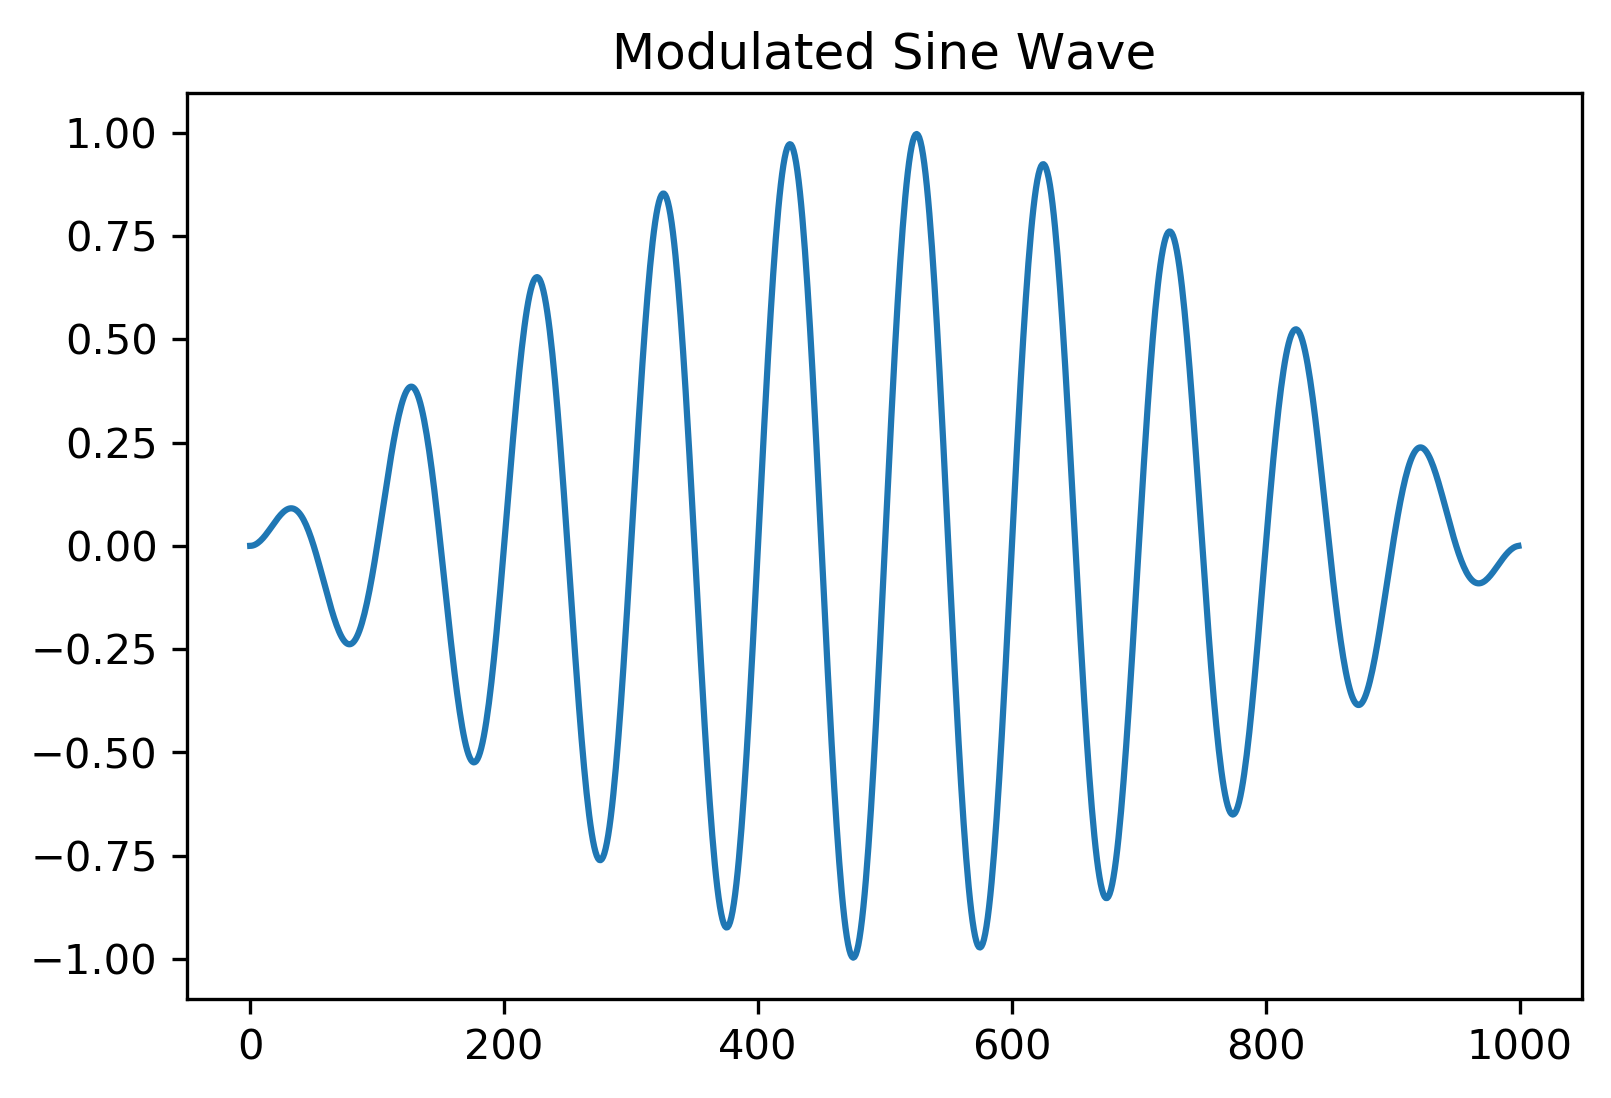

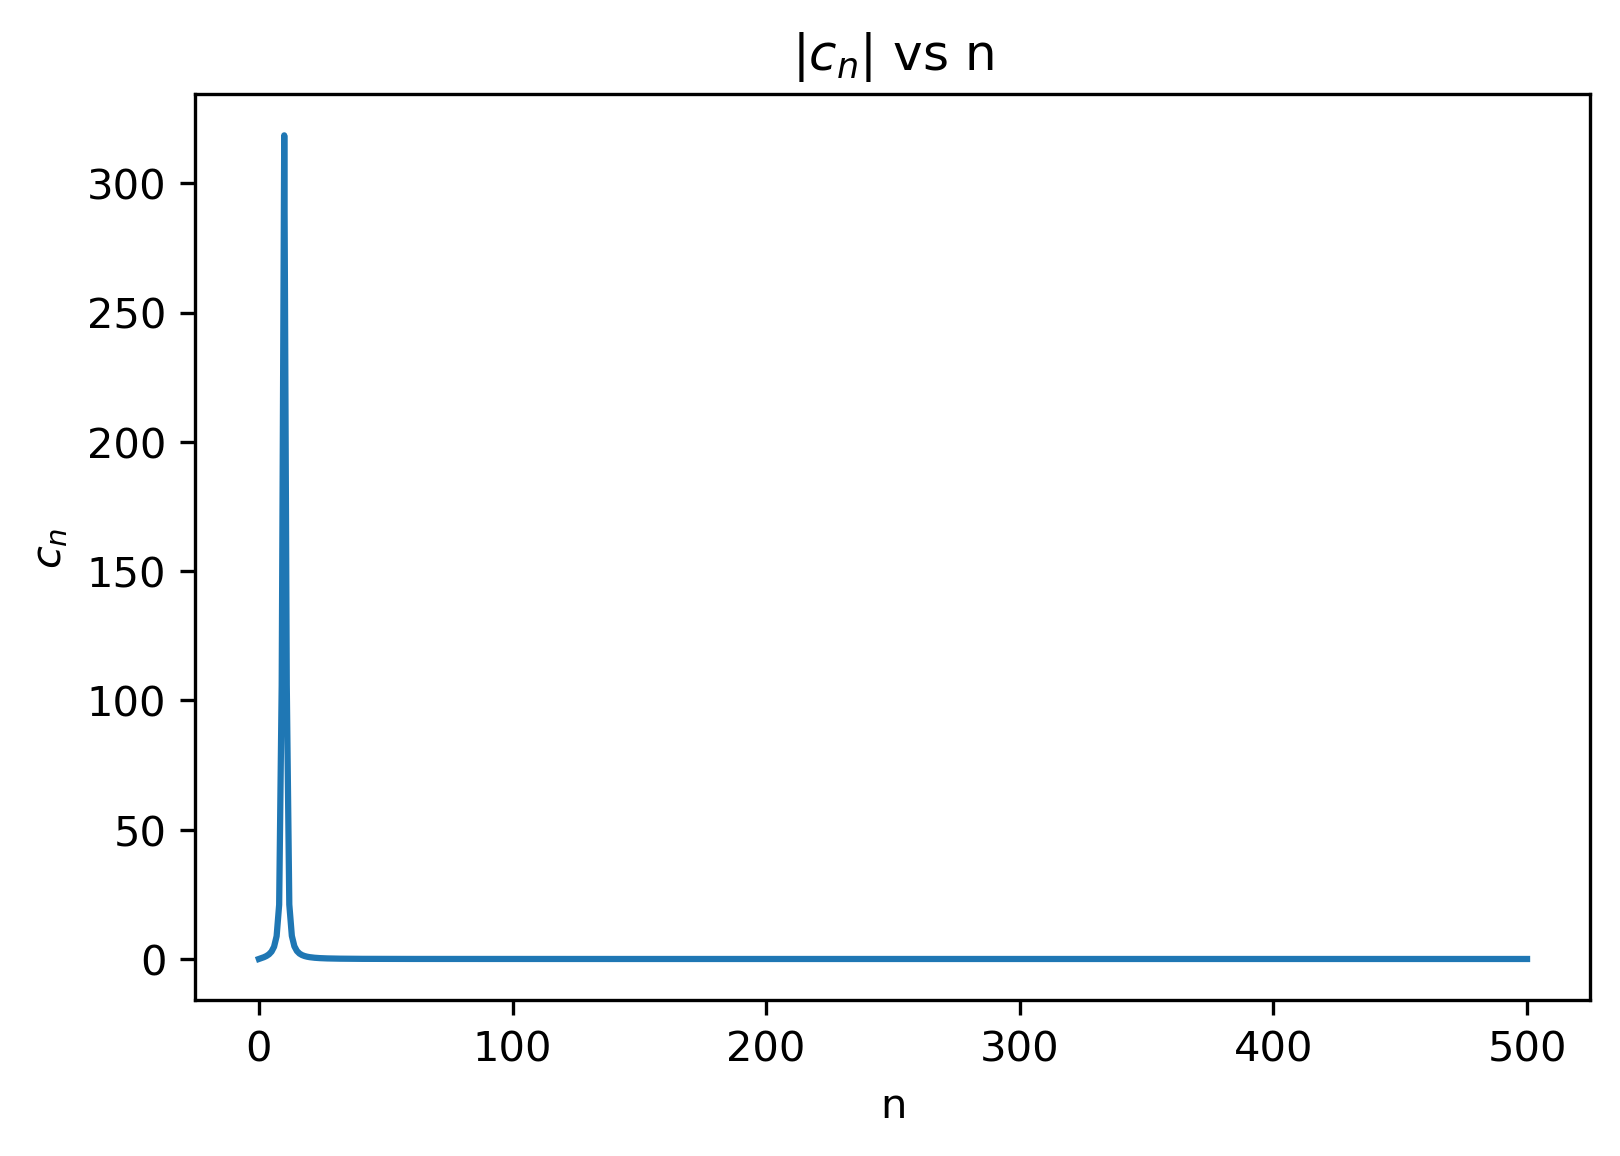

In [4]:
### PART C - Modulated sine way
N=1000
y=[]
x = np.arange(0,N)

# Create sine wave array
for i in x:
    y.append(np.sin(np.pi*i/N)*np.sin(20*np.pi*i/N))
    
# Plot
plt.figure(dpi=300)
plt.plot(y)
plt.title("Modulated Sine Wave")
plt.show()

# Take Fourier Transform and Plot
Y = np.fft.rfft(y)

plt.figure(dpi=300)
plt.plot(abs(Y))
plt.title("$|c_n|$ vs n")
plt.xlabel("n")
plt.ylabel("$c_n$")
plt.show()

### Exercise 7.2: Detecting Periodicity

a) plot sunspots.txt and make an estimate of the length of the cycle in months

b) Preform the DFT of the data and plot the results. Estimate the non-zero value of k for which there is the highest peak

c) Using this k, find the period of the data and compare with your estimate

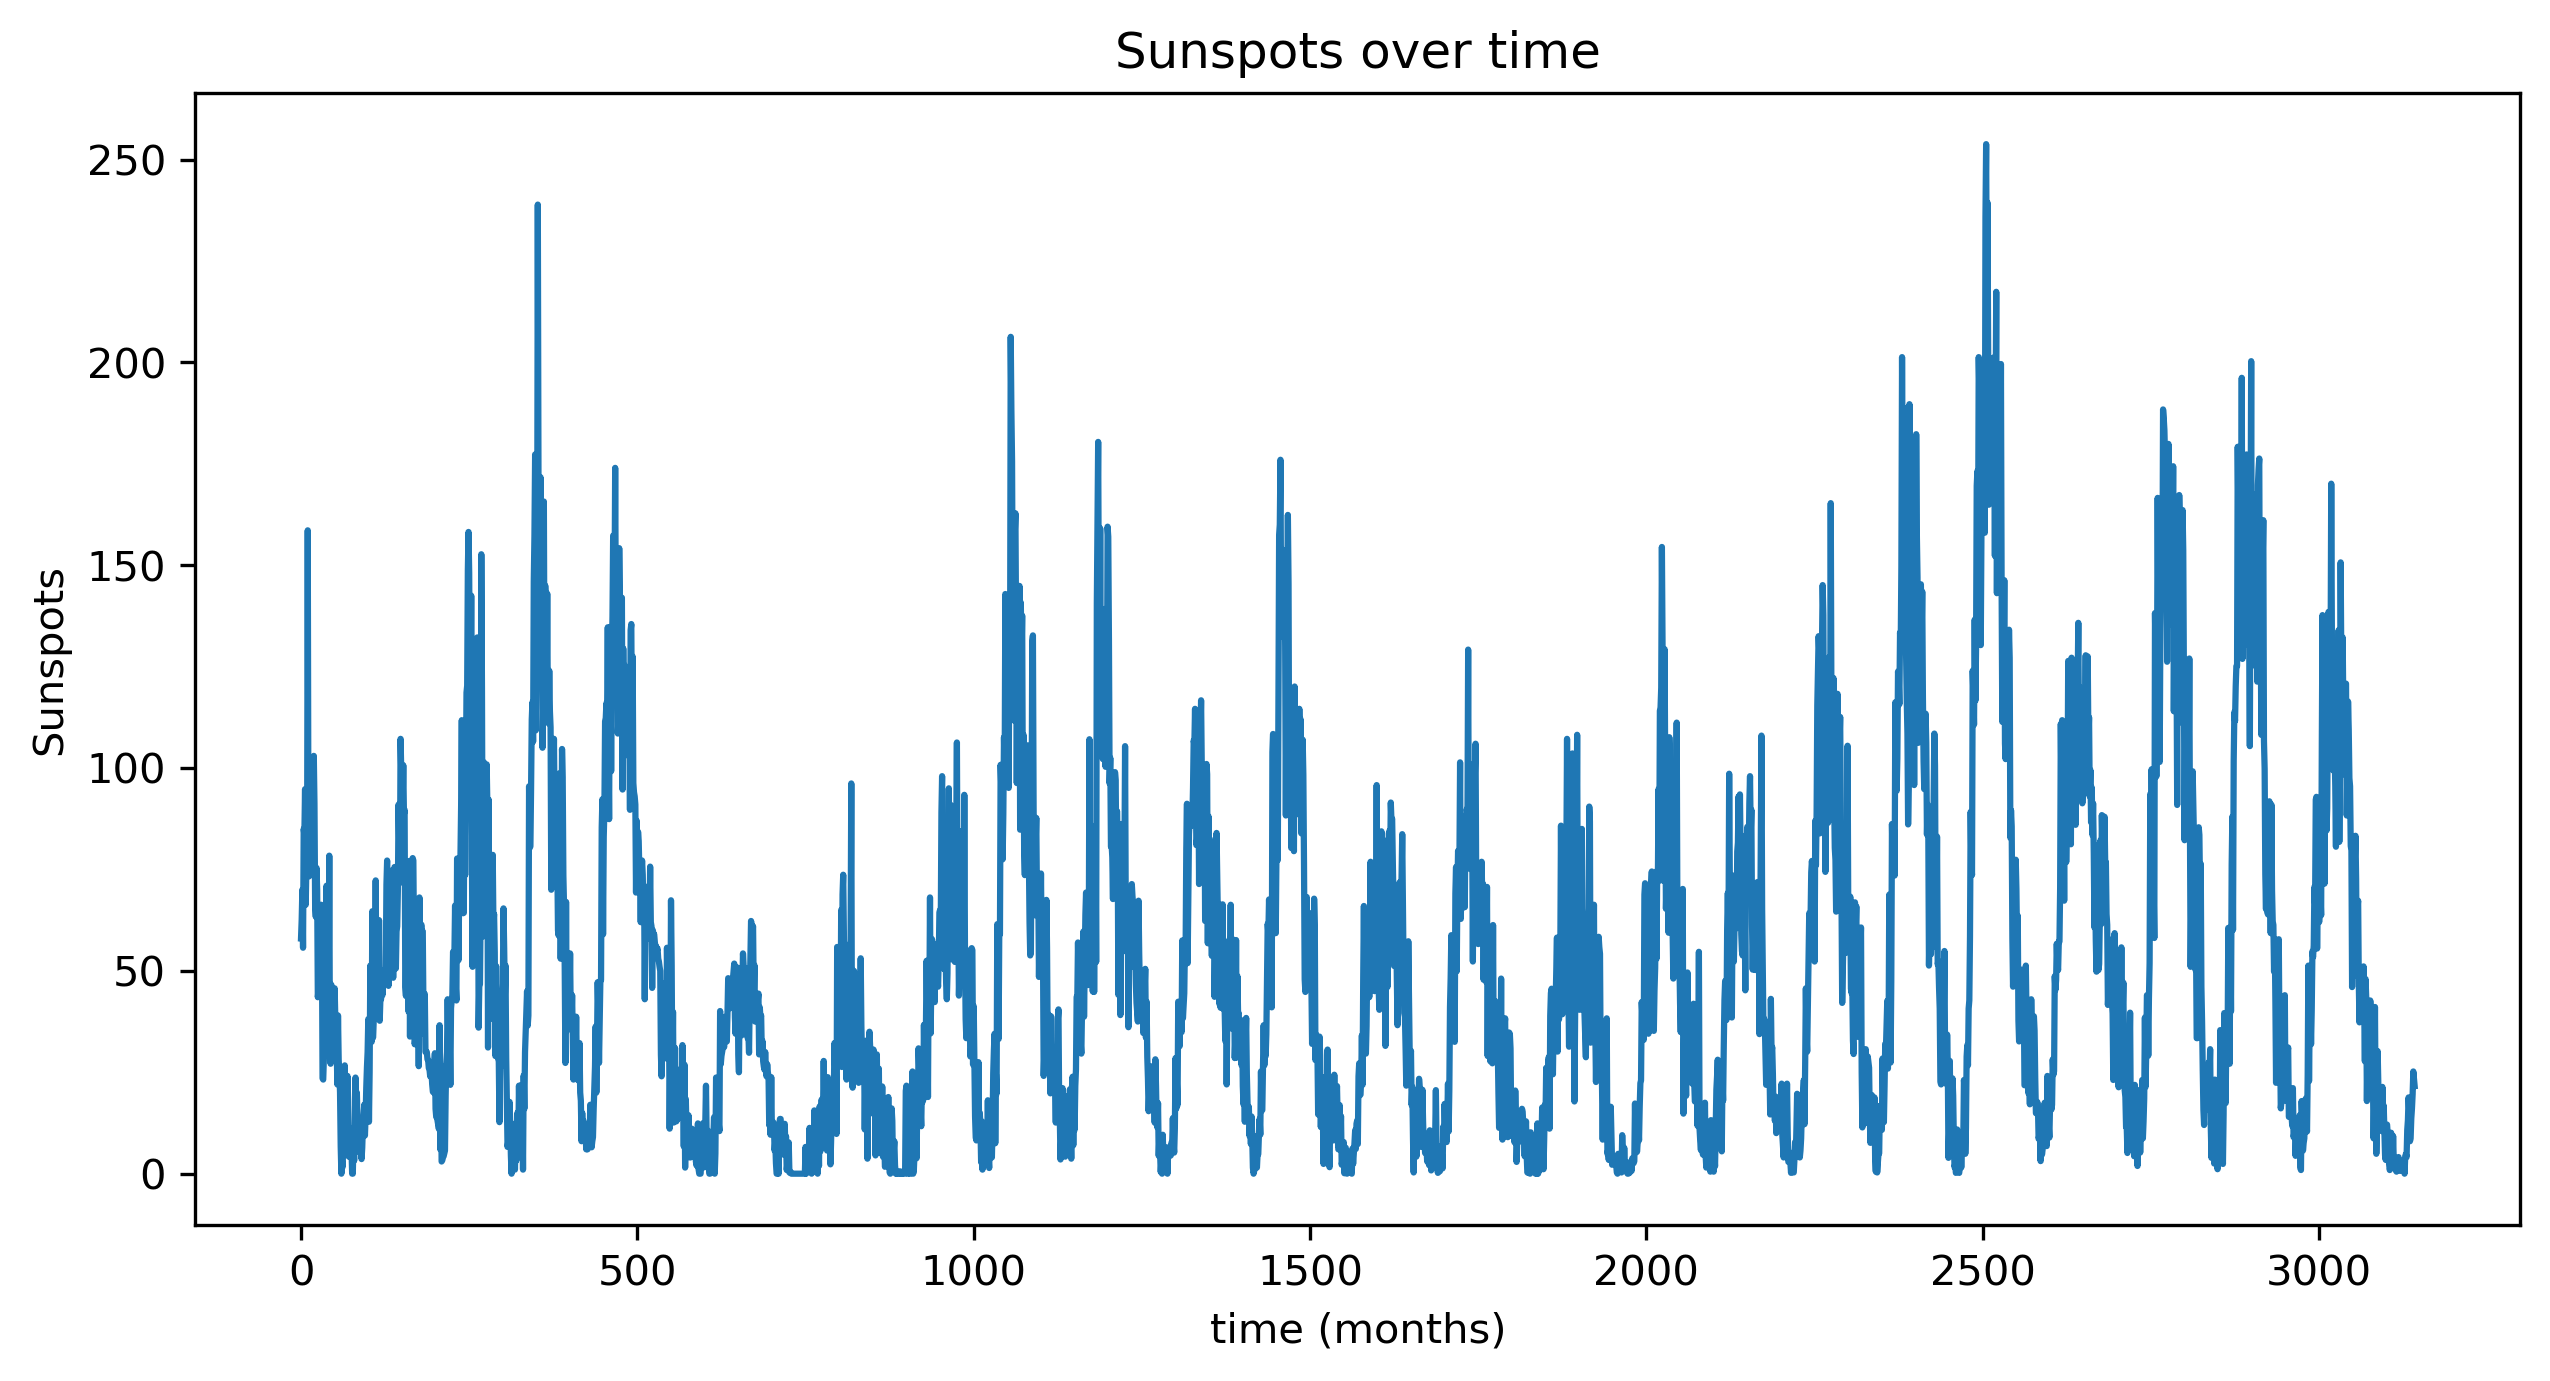

In [5]:
##PART A

#import file and separate columns
sunspots = np.genfromtxt("./Textbook Files/sunspots.txt")
x = sunspots[:,0]
y = sunspots[:,1]

plt.figure(1,[10,5],dpi=300)
plt.title("Sunspots over time")
plt.xlabel("time (months)")
plt.ylabel("Sunspots")
plt.plot(x,y)
plt.show()

It seems that the cycle is approximately 100 months

3143


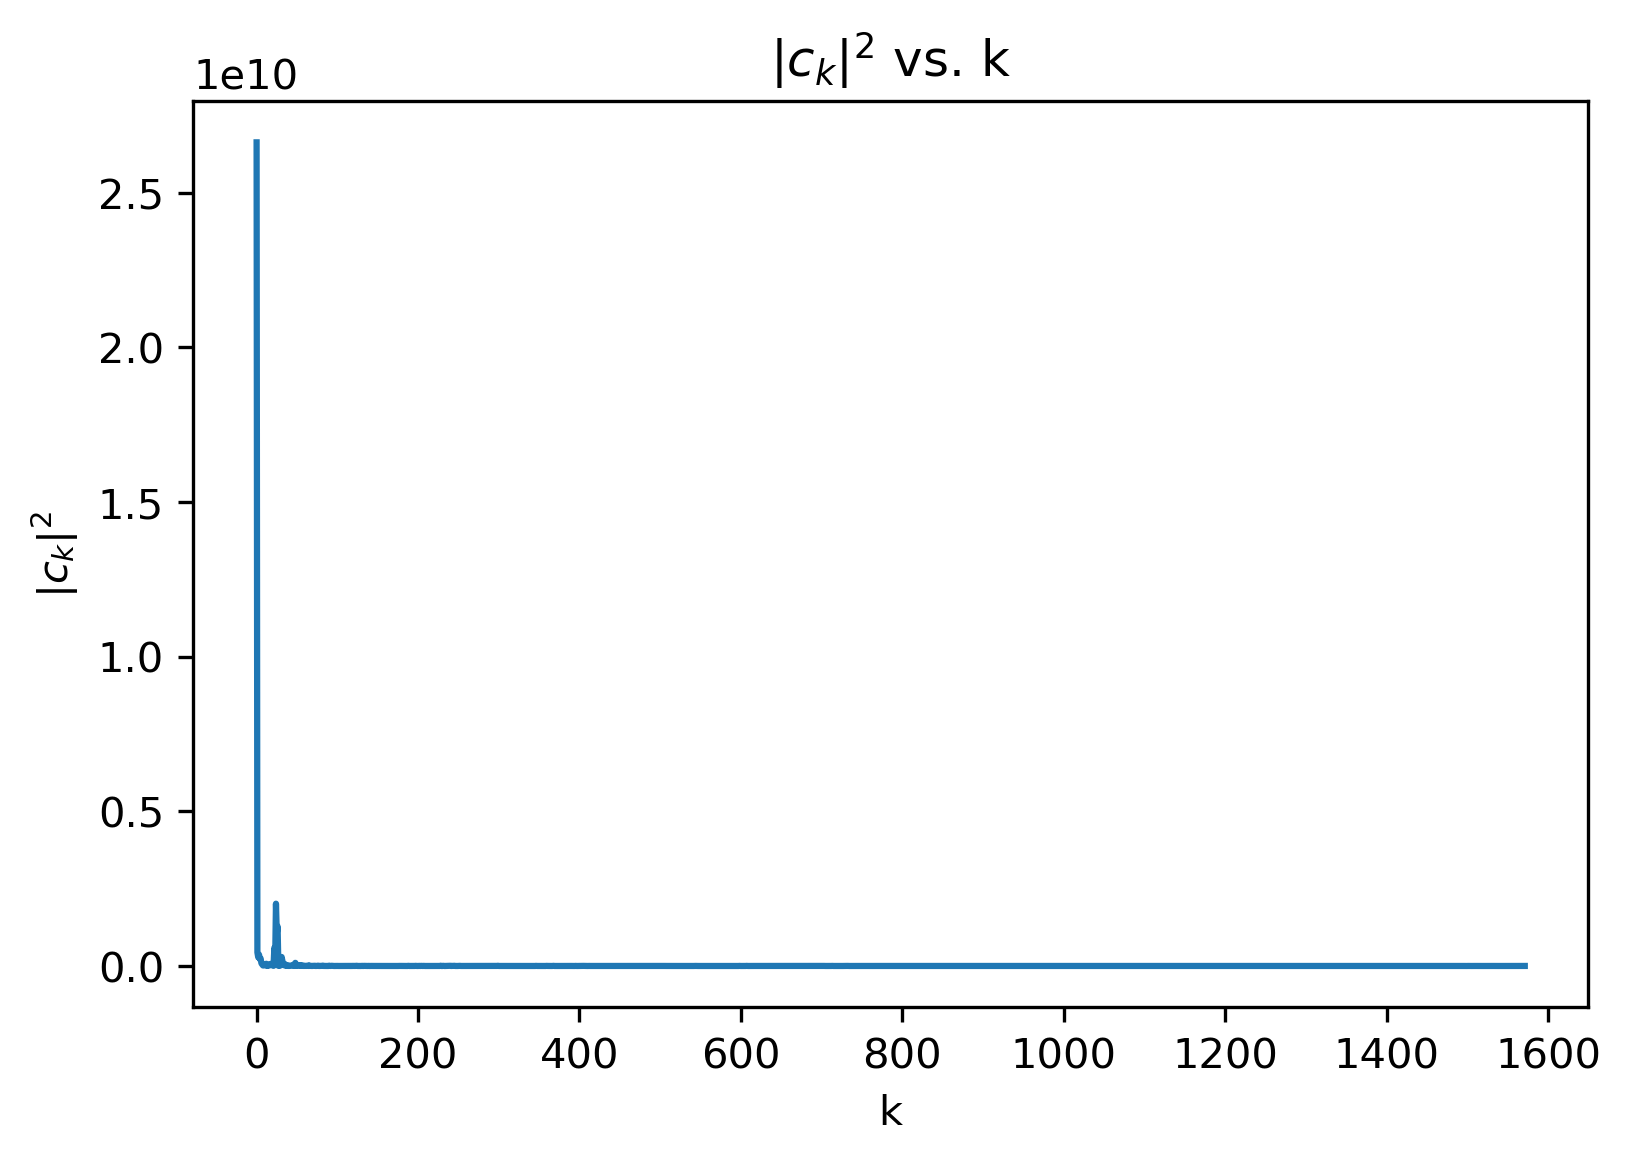

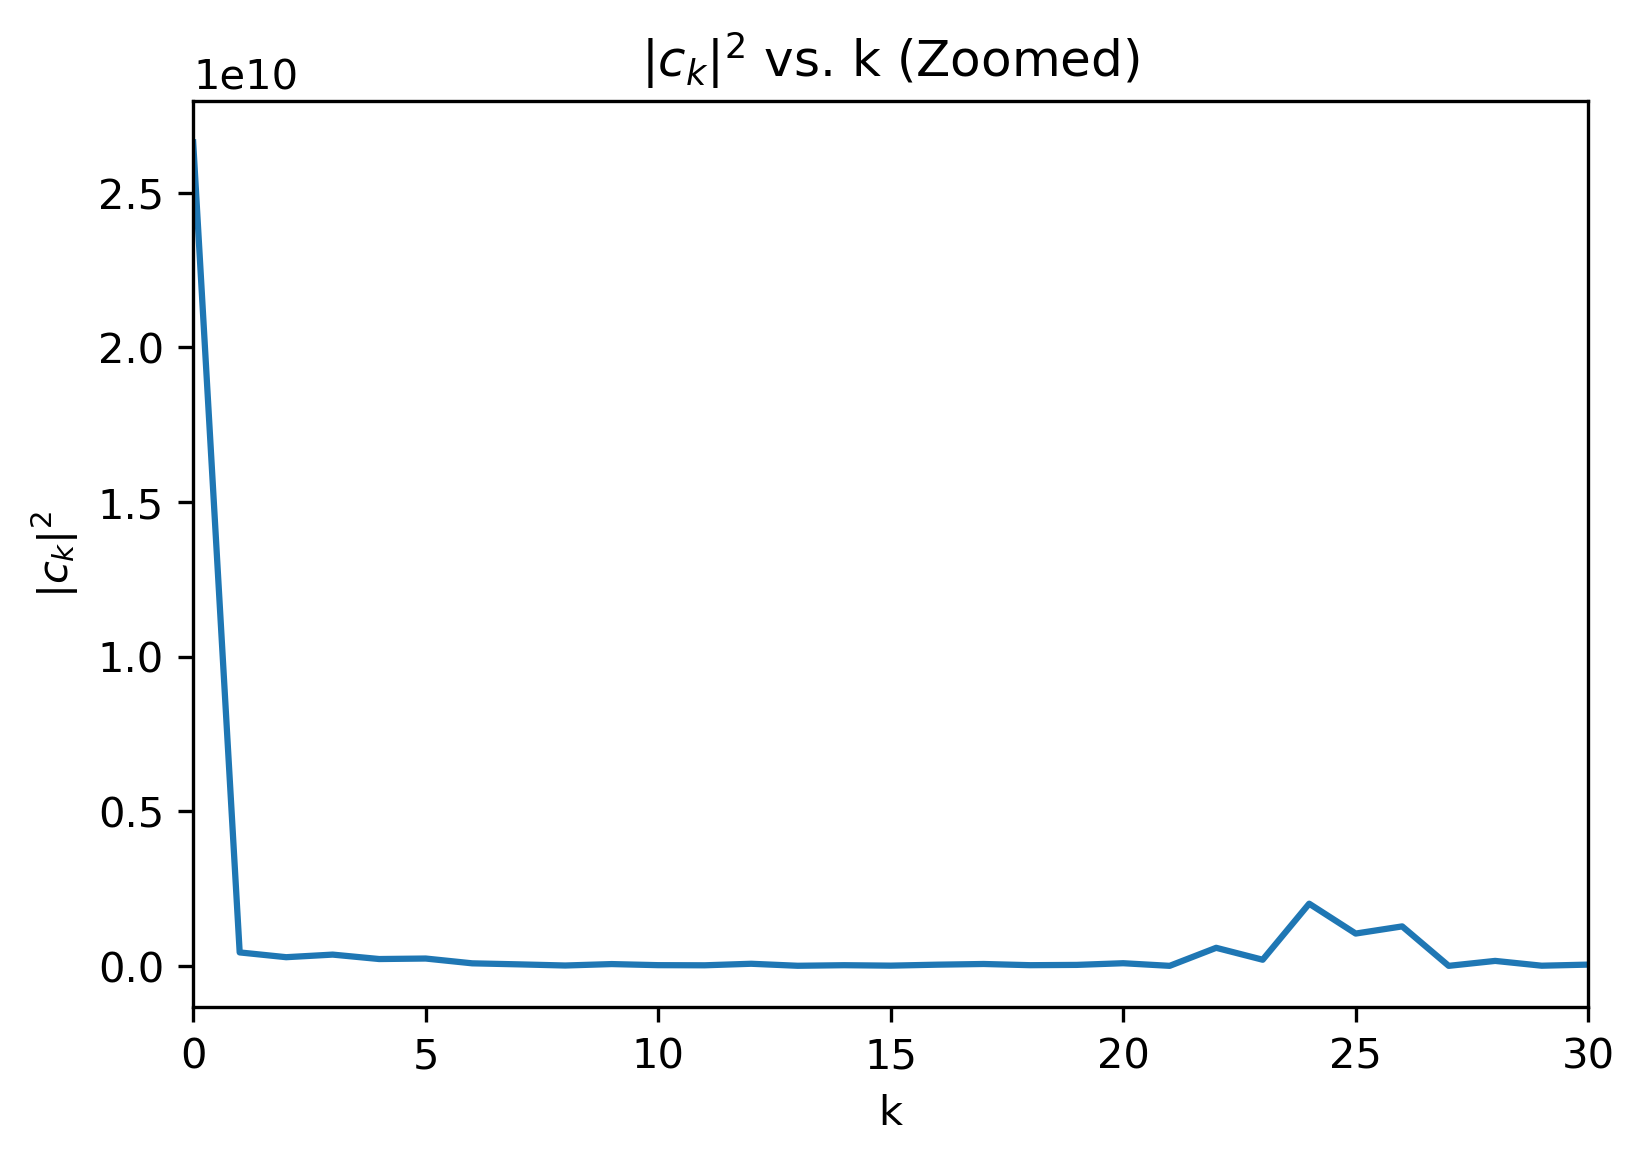

In [6]:
### PART B
print(len(y))
Y = np.fft.rfft(y)
ck = abs(Y)**2

plt.figure(dpi=300)
plt.plot(ck)
# plt.xlim(0,)
plt.title("$|c_k|^2$ vs. k")
plt.xlabel("k")
plt.ylabel("$|c_k|^2$")
plt.show()

plt.figure(dpi=300)
plt.plot(ck)
plt.xlim(0,30)
plt.title("$|c_k|^2$ vs. k (Zoomed)")
plt.xlabel("k")
plt.ylabel("$|c_k|^2$")
plt.show()

It seems that the largest peak is around k = 24

We know that this is represented by $sin(\frac{2\pi kx}{N})$

with $\omega = \frac{2\pi k}{N} = 2\pi f$

so the period of a cycle is: $T = 1/f = N/k$ 

So $T = N/24$

In [7]:
### Calculating Length of cycle:

N = len(y)
print(f'The actual cycle is {N/24:.2f} months, compared to our estimate of 100 months')

The actual cycle is 130.96 months, compared to our estimate of 100 months


### Exercise 7.3: Musical Instruments

a) Write a program that preforms the DFT of piano.txt and trumpet.txt and plot the first 10,000 samples.  What can you conclude about the sound of the piano and the sound of the trumpet.

b) Both were recorded at 44,100 samples per second and played the same musical note.  Calculate what note they were playing.

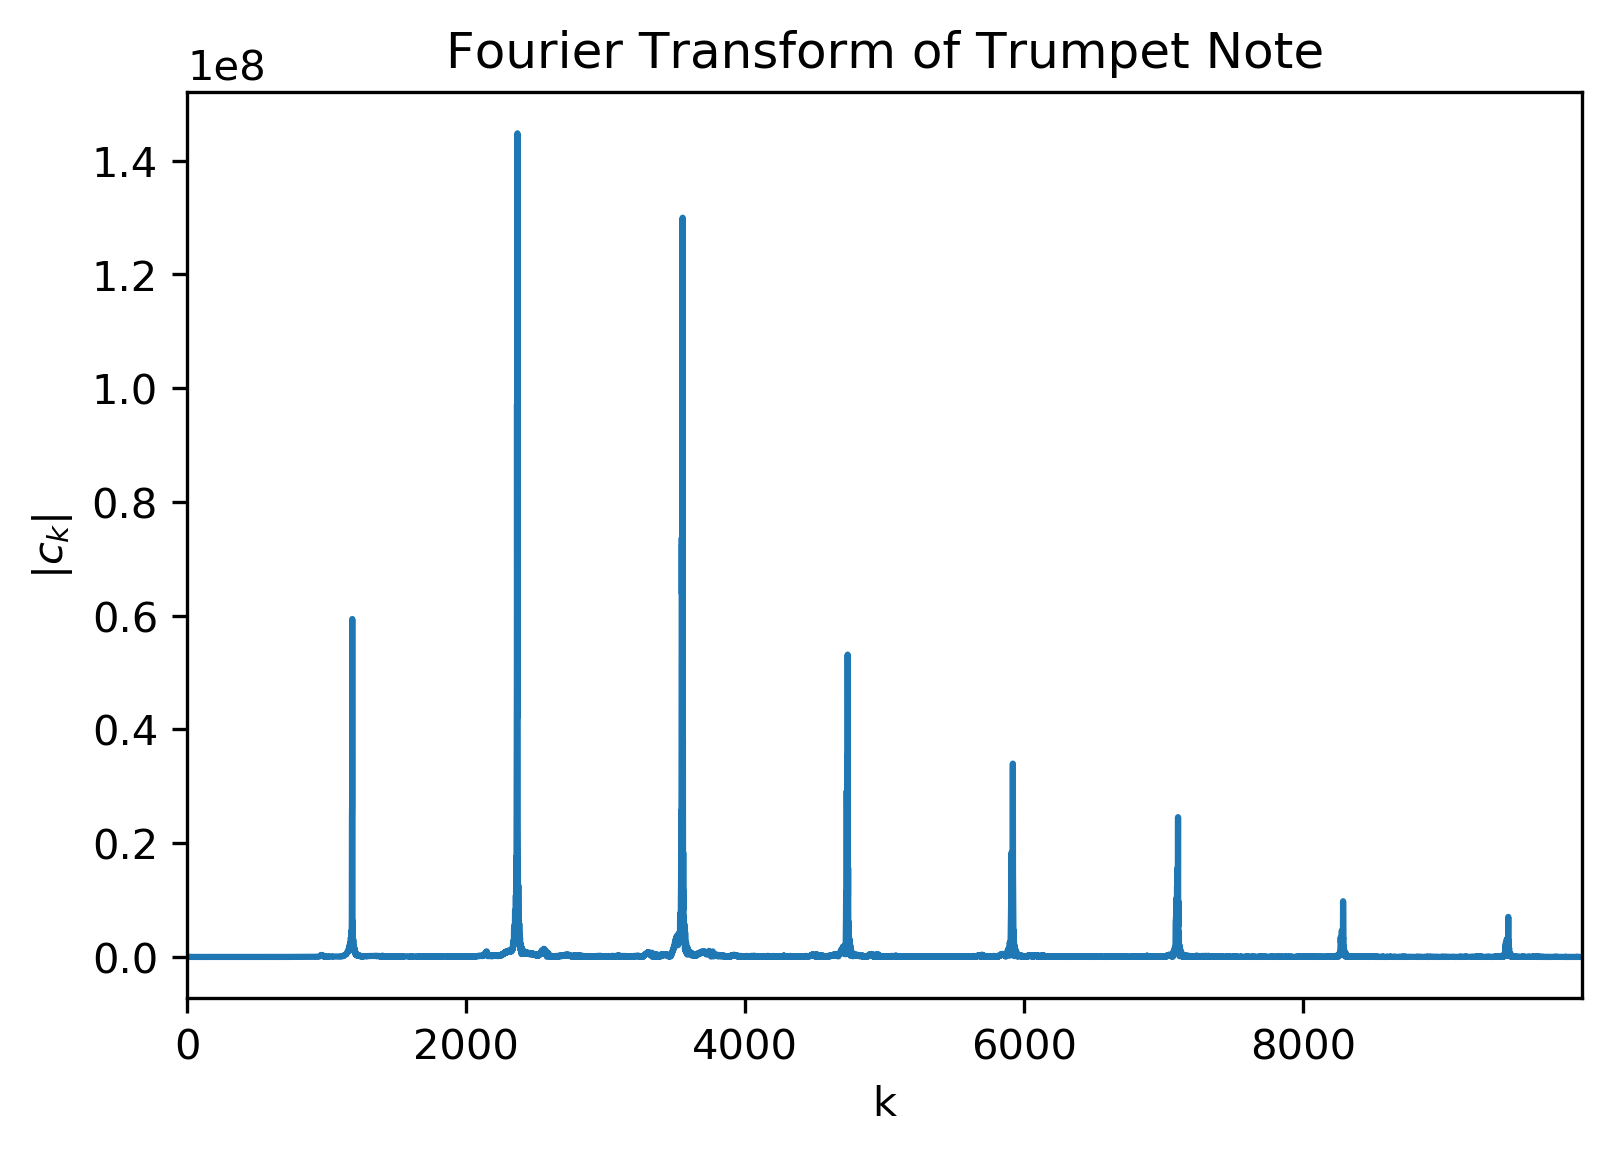

k = [2367]


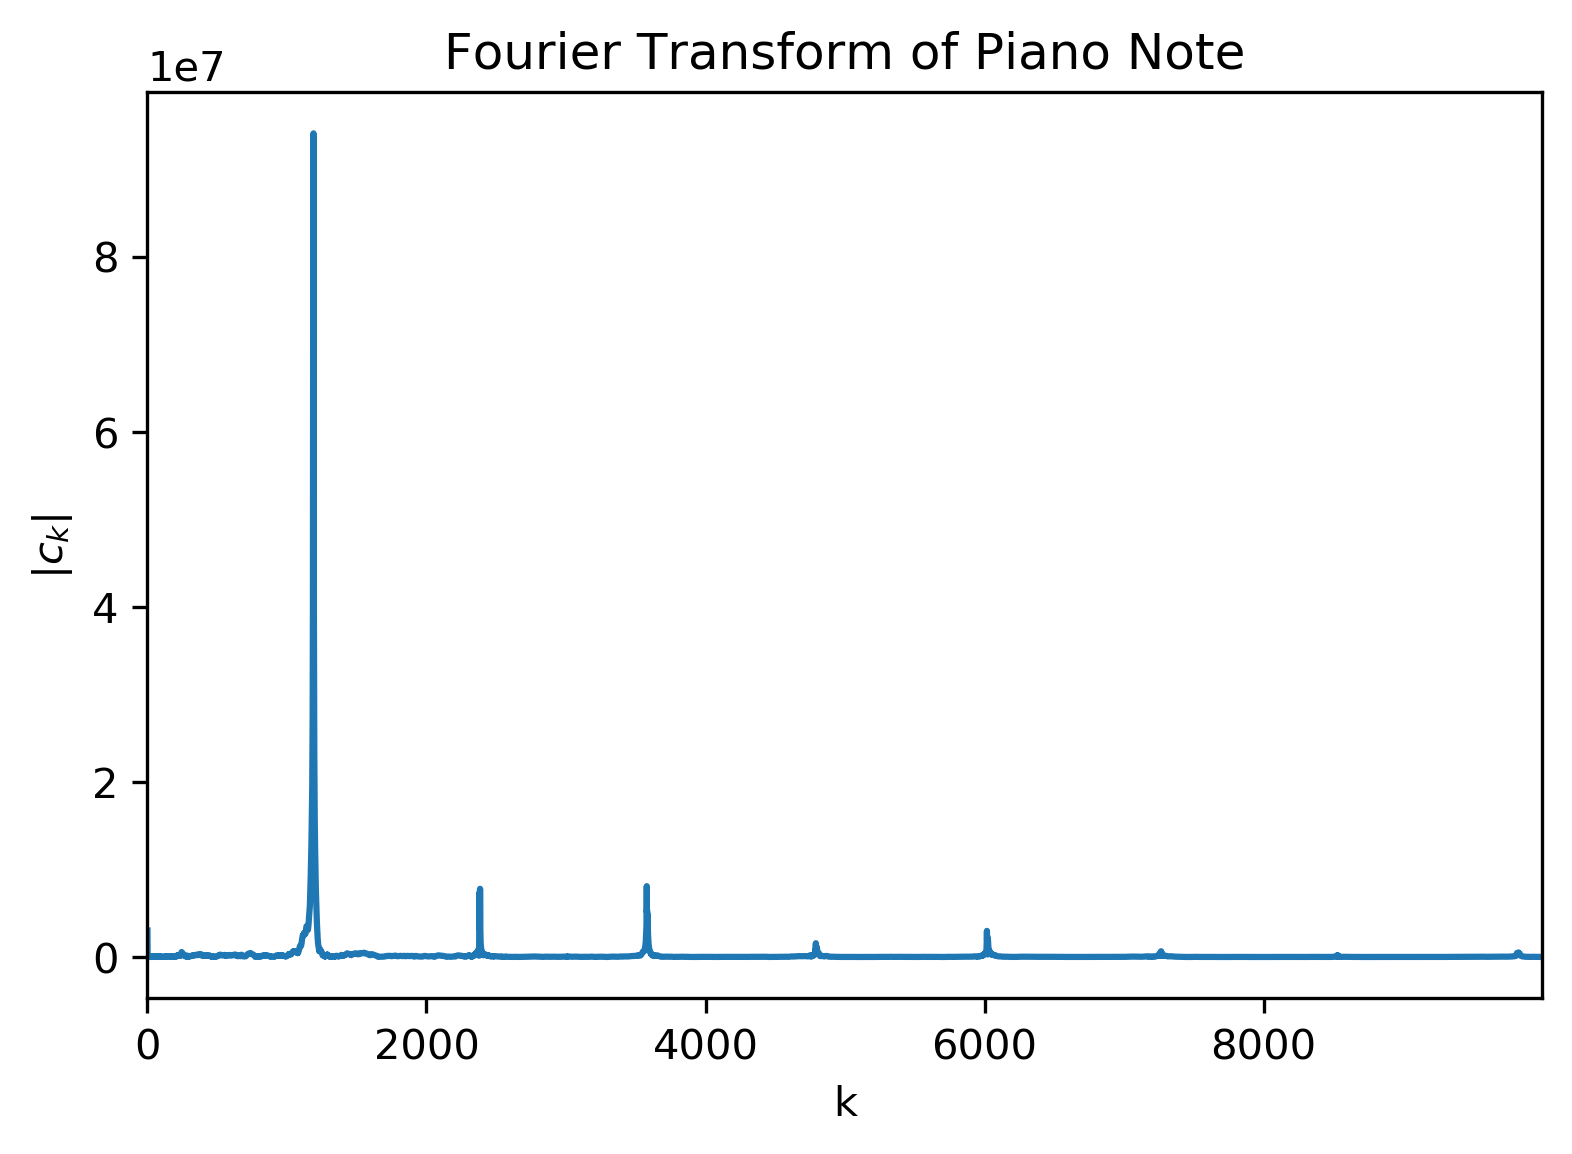

k = [1191]


In [8]:
trumpet = np.genfromtxt("./Textbook Files/trumpet.txt")

Ck = np.fft.rfft(trumpet)

plt.figure(dpi=300)
plt.title("Fourier Transform of Trumpet Note")
plt.xlabel("k")
plt.ylabel("$|c_k|$")
plt.plot(abs(Ck))
plt.xlim(0,9999)
plt.show()

#Find the value of k for which Ck is maximum
k1 = np.where(Ck == np.amax(Ck))
print(f"k = {k1[0]}")

piano = np.genfromtxt("./Textbook Files/piano.txt")

Ck_p = np.fft.rfft(piano)

# Plot Fourier Transform
plt.figure(dpi=300)
plt.title("Fourier Transform of Piano Note")
plt.xlabel("k")
plt.ylabel("$|c_k|$")
plt.plot(abs(Ck_p))
plt.xlim(0,9999)
plt.show()

#Find the value of k for which Ck is maximum
k2 = np.where(Ck_p == np.amax(Ck_p))
print(f"k = {k2[0]}")

We can tell that the piano sound very different from the trumpet, as the trumpet has many more powerful overtones than the piano.  They also seem to be playing a different octave from eachother, as the largest peak is at different k

In [9]:
# The frequency of each k is f = k * 44,100 / (samples)
samples = len(piano)
c = 44100/samples

# for the trumpet

f1 = 2367*c

print(f"The frequency of the trumpet note is {f1:.0f} Hz")

# for the piano

f2 = 1191*c

print(f"The frequency of the piano note is {f2:.0f} Hz")

The frequency of the trumpet note is 1044 Hz
The frequency of the piano note is 525 Hz


Therefore, the trumpet was playing note: $C_6$ and the piano was playing note: $C_5$


### Exercise 7.4: Smoothing

a) Read and plot data from dow.txt

b) Calculate the coefficients of DFT using numpy

c) Set all but first 10% of elements (coefficients) to zero

d) Calculate the inverse DFT, plot this on the same graph as the original.  Comment what you see.  What is happening when coefficients are set to zero?

e) Modify your program so it sets only first 2% of elements to zero

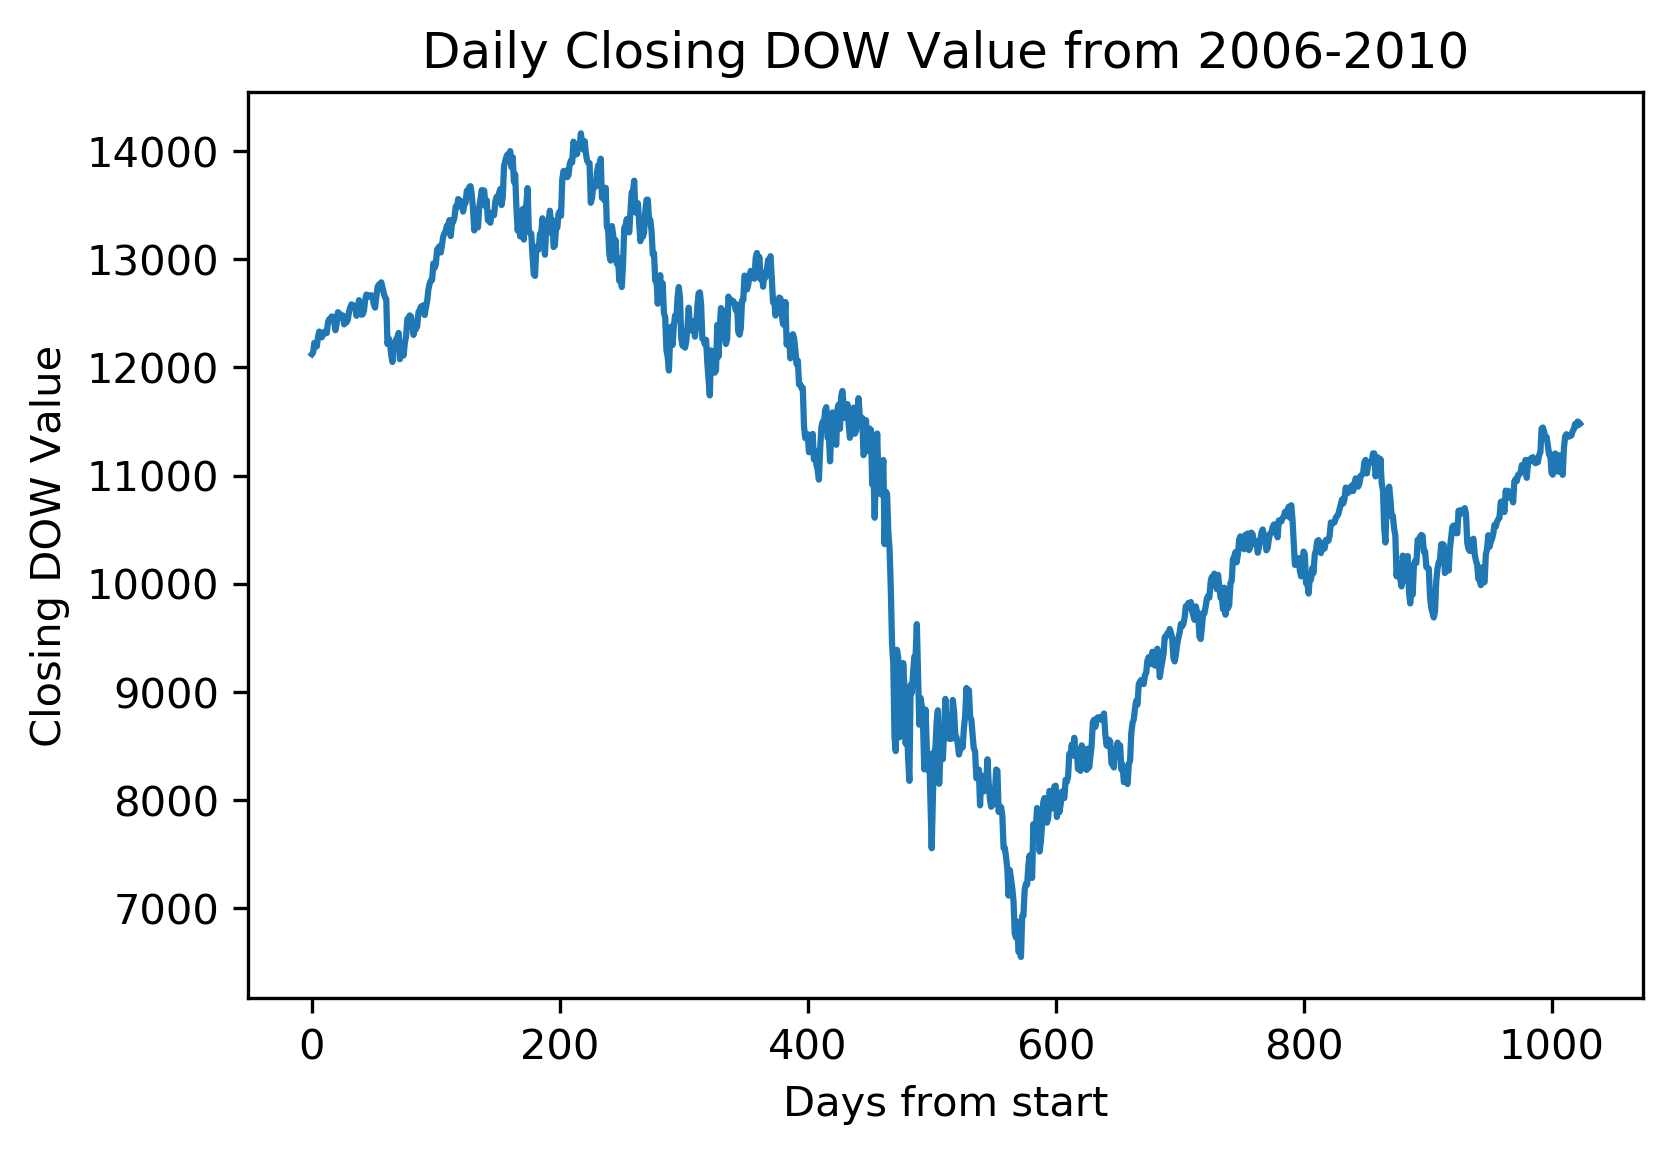

In [10]:
### Part A

# Load file and plot original data
dow = np.genfromtxt("./Textbook Files/dow.txt")

plt.figure(dpi=300)
plt.title("Daily Closing DOW Value from 2006-2010")
plt.xlabel("Days from start")
plt.ylabel("Closing DOW Value")
plt.plot(dow)
plt.show()


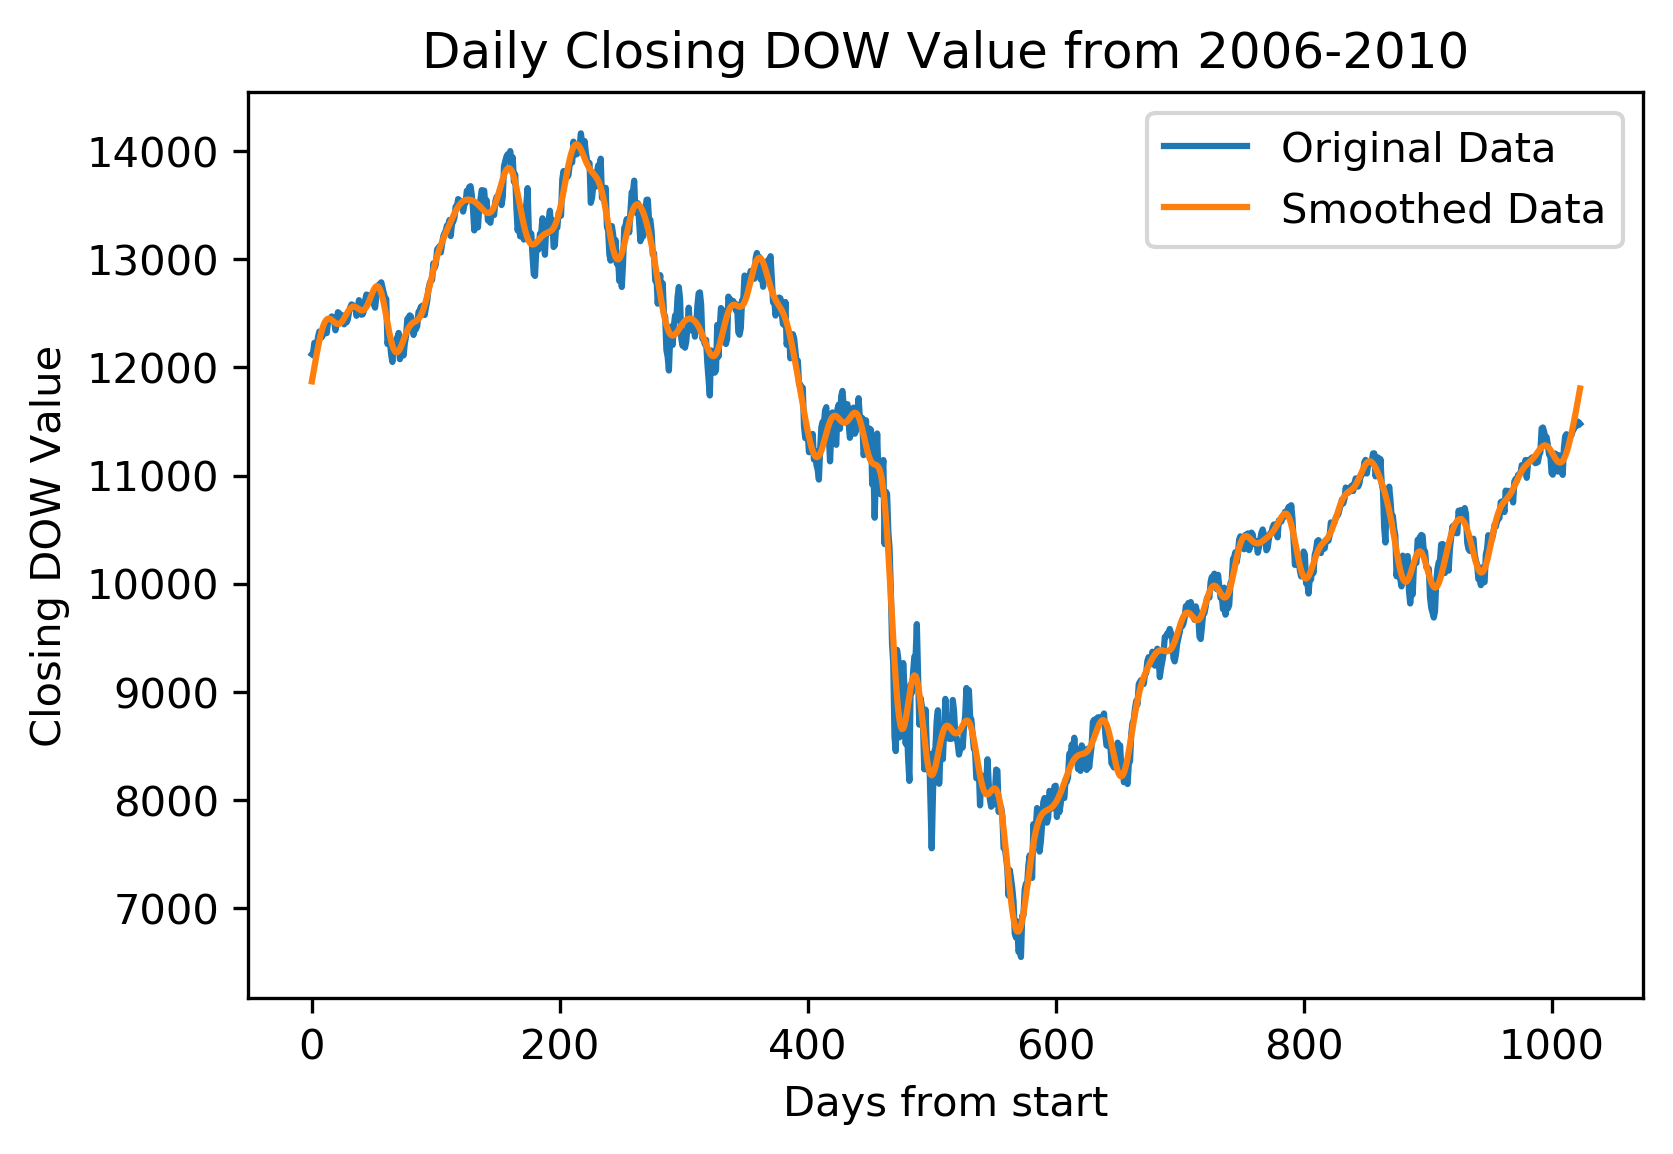

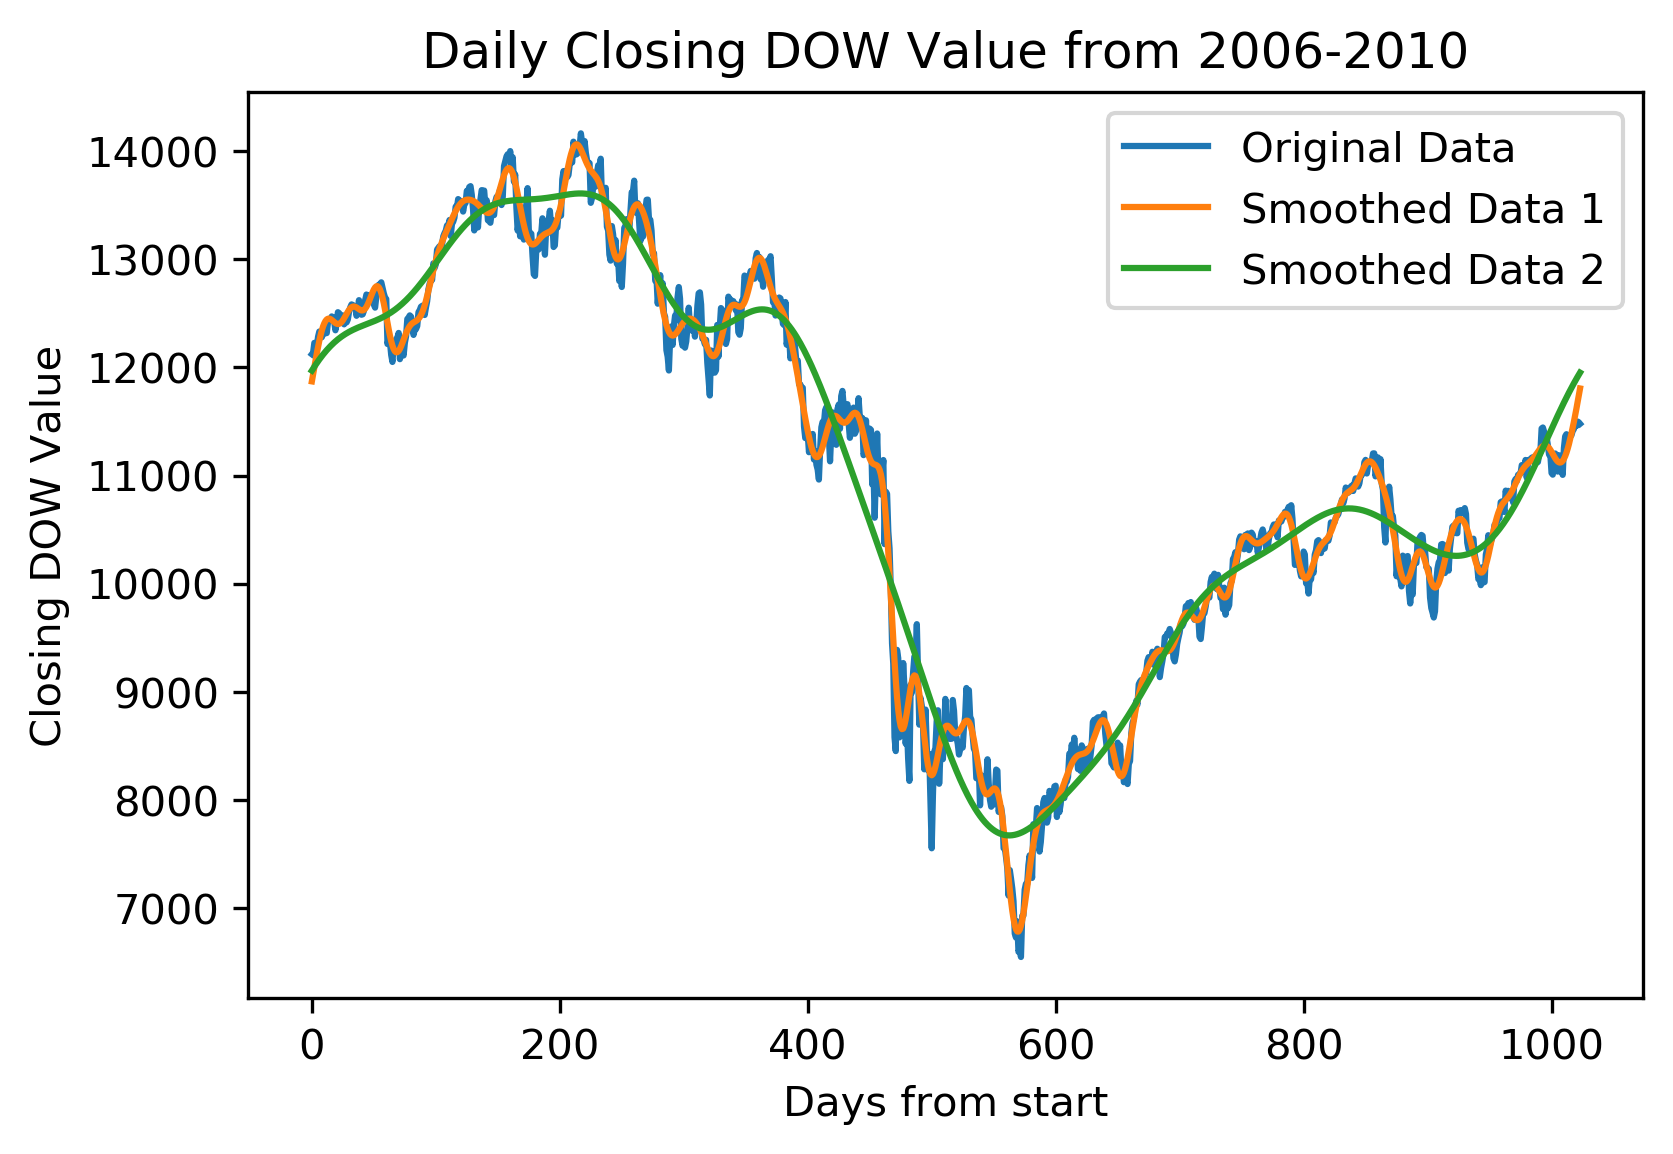

In [11]:
### PARTS B-E

# Perform DFT
DOW = np.fft.rfft(dow)

# Set all but first 10% of data to zero
for i in range(len(DOW)//10,len(DOW)):
    DOW[i] = 0

# Inverse DFT new array
dowSmooth = np.fft.irfft(DOW)

# Plot
plt.figure(dpi=300)
plt.title("Daily Closing DOW Value from 2006-2010")
plt.xlabel("Days from start")
plt.ylabel("Closing DOW Value")
plt.plot(dow, label="Original Data")
plt.plot(dowSmooth, label = "Smoothed Data")
plt.legend()
plt.show()
    
# Perform DFT
DOW2 = np.fft.rfft(dow)

# Set all but first 10% of data to zero
for i in range(len(DOW2)//50,len(DOW2)):
    DOW2[i] = 0
    

# Inverse DFT new array
dowSmooth2 = np.fft.irfft(DOW2)

# Plot
plt.figure(dpi=300)
plt.title("Daily Closing DOW Value from 2006-2010")
plt.xlabel("Days from start")
plt.ylabel("Closing DOW Value")
plt.plot(dow, label="Original Data")
plt.plot(dowSmooth, label = "Smoothed Data 1")
plt.plot(dowSmooth2, label = "Smoothed Data 2")
plt.legend()
plt.show()

d) We see that the data is much less noisy than the original data set, and that some of the sharp peaks have been removed from that data.  When we set coefficients with larger k = 0 we are essentially removing the high frequency periodic structure of the data, which is the sharp noise.  The closer k gets to zero when we set all values k > i, the lower the frequency of data displayed

### Exercise 7.5: Artifacts

We have the function $f(t)$ which is a square wave with Amp = 1 and freq = 1 Hz

$$f(t) = \begin{cases}
1 & \text{if [2t] is even} \\
-1 & \text{if [2t] is odd} \\
\end{cases}$$

where [x] means x rounded down to the next lowest integer.

Write a program that creates an array of 1000 elements of equally spaced points from a single cycle of this wave.  Calculate the DFT, set all but first 10 coefficients to zero, then inverse DFT and plot over the original.  Explain the wiggles and artifcats in results.


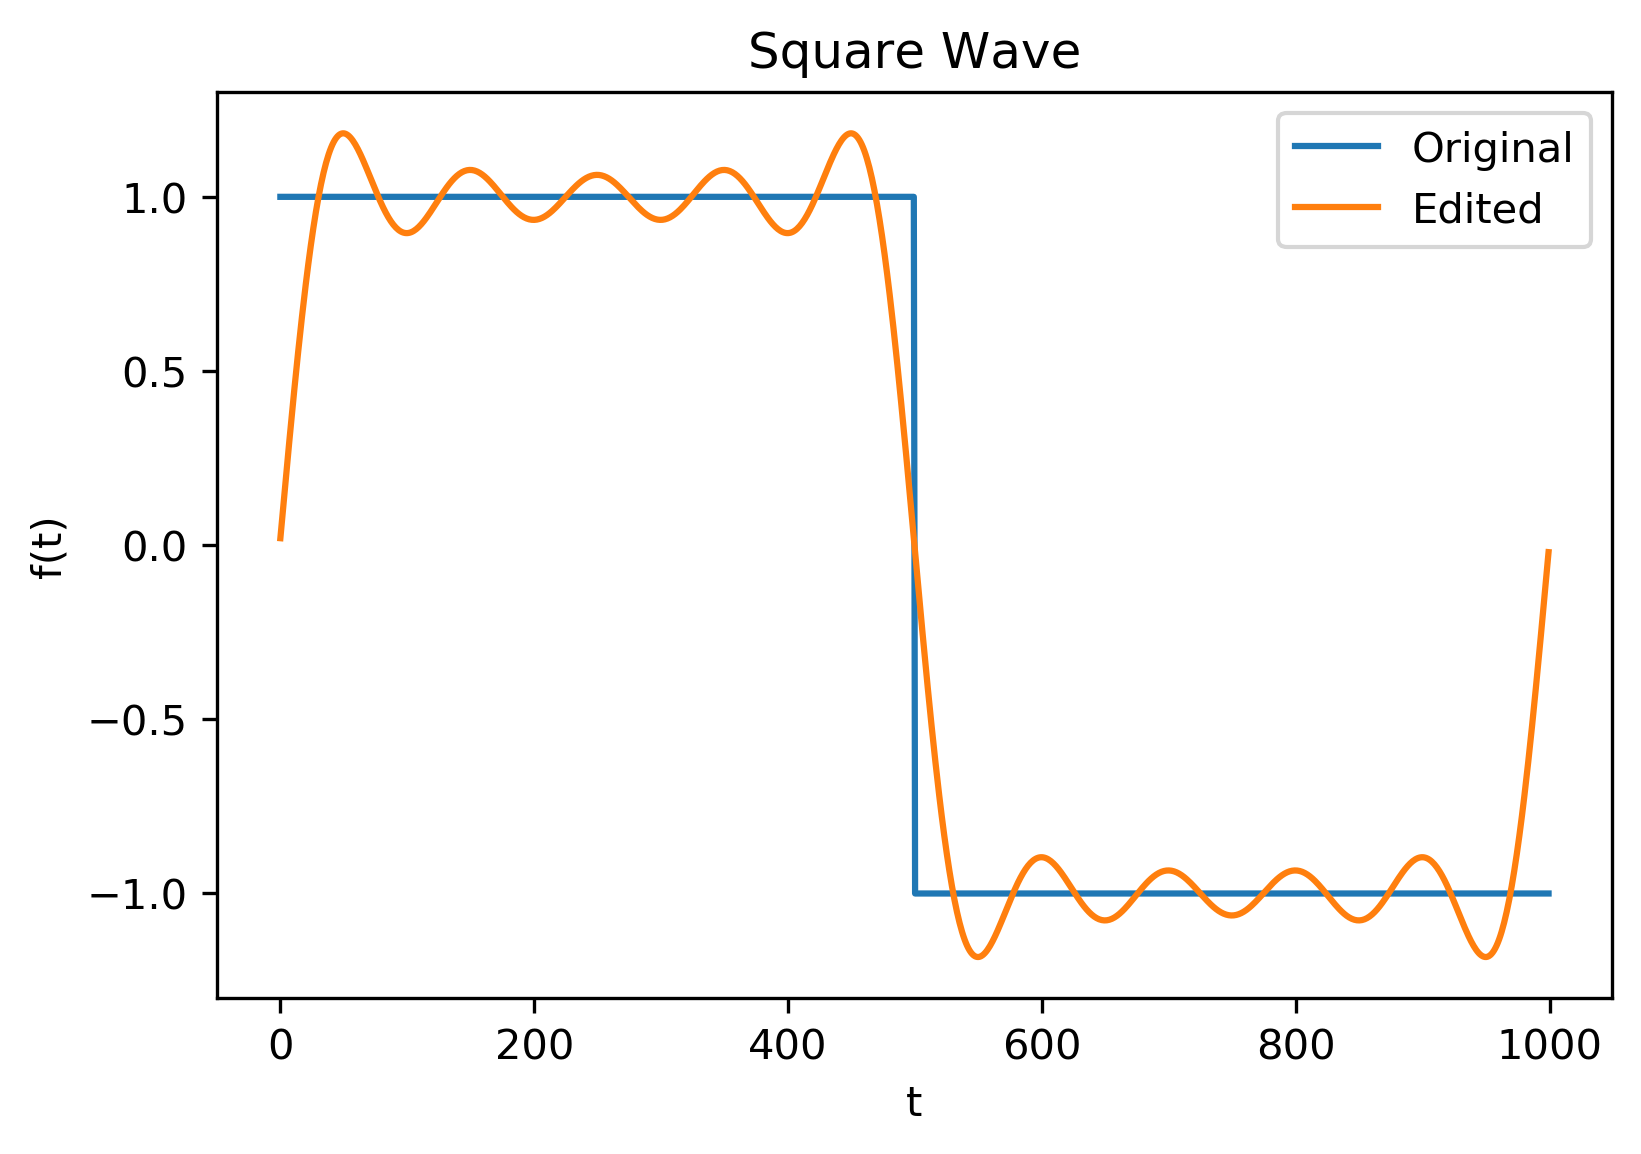

In [12]:
# Define the square wave function
def f(t):
    if  np.int(2*t // 1) % 2 == 0:
        return 1
    if np.int(2*t // 1) % 2 == 1:
        return -1
    
x = np.linspace(0,1,1000, endpoint=False)

# Create square wave array
y = []
for i in x:
    y.append(f(i))

# FT square wave
Y = np.fft.rfft(y)

# Keep the first 10 coeff, 0 the rest
for i in np.arange(11,len(Y)):
    Y[i] = 0
    
# inverse FT to get decomposed image
y_s = np.fft.irfft(Y)

# Plot
plt.figure(dpi=300)
plt.title("Square Wave")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.plot(y, label="Original")
plt.plot(y_s, label="Edited")
plt.legend()
plt.show()

When we represent a square wave in a Fourier series, we are essentially breaking it down into a sum of the odd sine harmonics.  As we add higher and higher frequency sine waves to this series, we get closer to a "straight" line.  When we removed the higher frequency parts, we were left with the sum lower frequency sine waves, which is why you see the wiggles and artifacts

### Exercise 7.9: Image Deconvolution

The picture can be represented by $a(x,y)$ which tells you the brightness at each point (x,y).  The brightness of the blurred photo (dimensions K x L) at point x,y is:

$$b(x,y) = \int_0^K \int_0^L a(x',y')f(x-x',y-y')dx'dy'$$

The FT of the blurred picture can be written as:
$$\bar{b}_{kl} = KL\bar{a}_{kl}\bar{f}_{kl}$$

where $\bar{f}_{kl}$ is the FT of the point spread function and $\bar{a}_{kl}$ is the FT of the clean photo.  In order to get the FT of the clean photo we divide over terms:

$$\frac{\bar{b}_{kl}}{KL\bar{f}_{kl}} = \bar{a}_{kl}$$

We then take the inverse FT of $\bar{a}_{kl}$ to get the original image.

the PSF for most cameras can be assumed to be:

$$f(x,y) = exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)$$

a) blur.txt is a blurred picture with $\sigma = 25$.  Write a program that reads the grid values in a 2D array of numbers and plots them in a density plot.

b) Write another program that creates an array the same size as the photo containing a grid of samples from the gaussian $f(x,y)$.  Plot this.

c) Combine the two programs into a program that:
    i) Reads the blurred photo
    ii) Calculates PSF
    iii) FT's both
    iv) Divides on by another
    v) Preforms inverse FT
    vi) Displayes unblurred photo

d) What limits our ability to deblur a photo?  Why can we not perfectly unblu any photo?



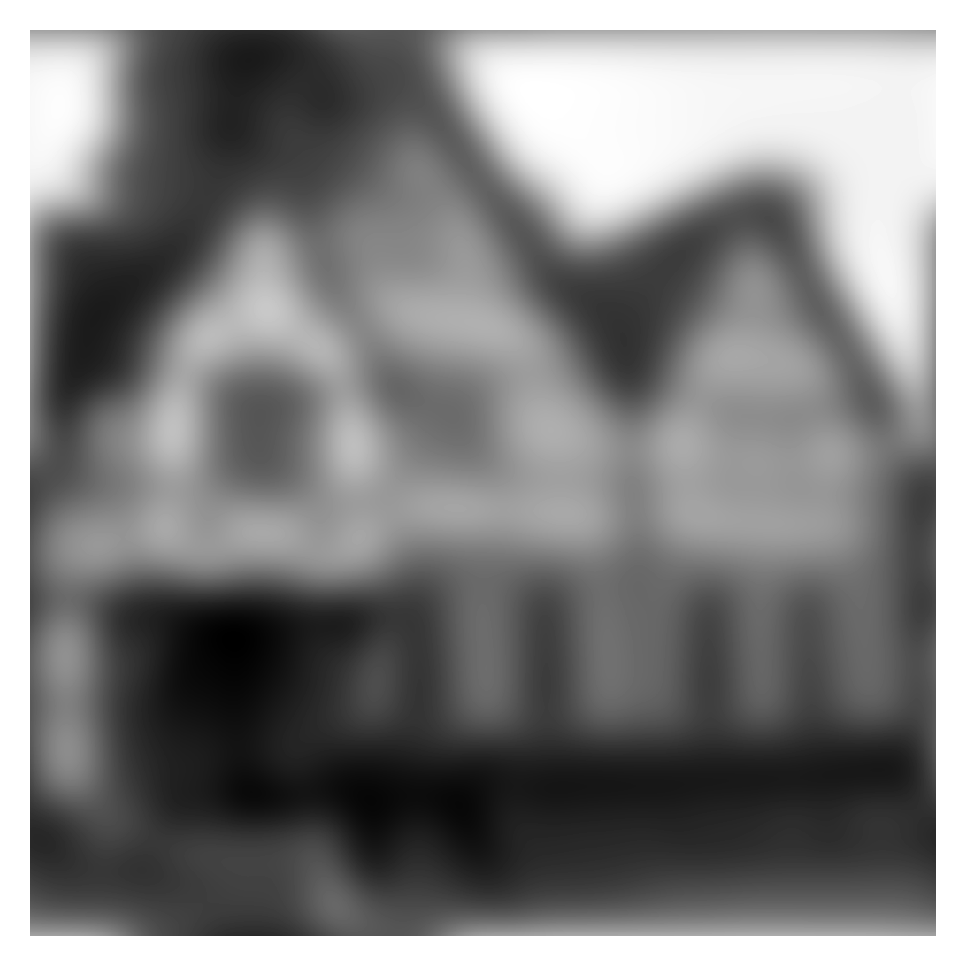

In [13]:
### PART A

# Read file
blur = np.genfromtxt("./Textbook Files/blur.txt")

# Display Blurred Image
plt.figure(dpi=300)
plt.axis("off")
plt.imshow(blur, cmap="gray")
plt.show()

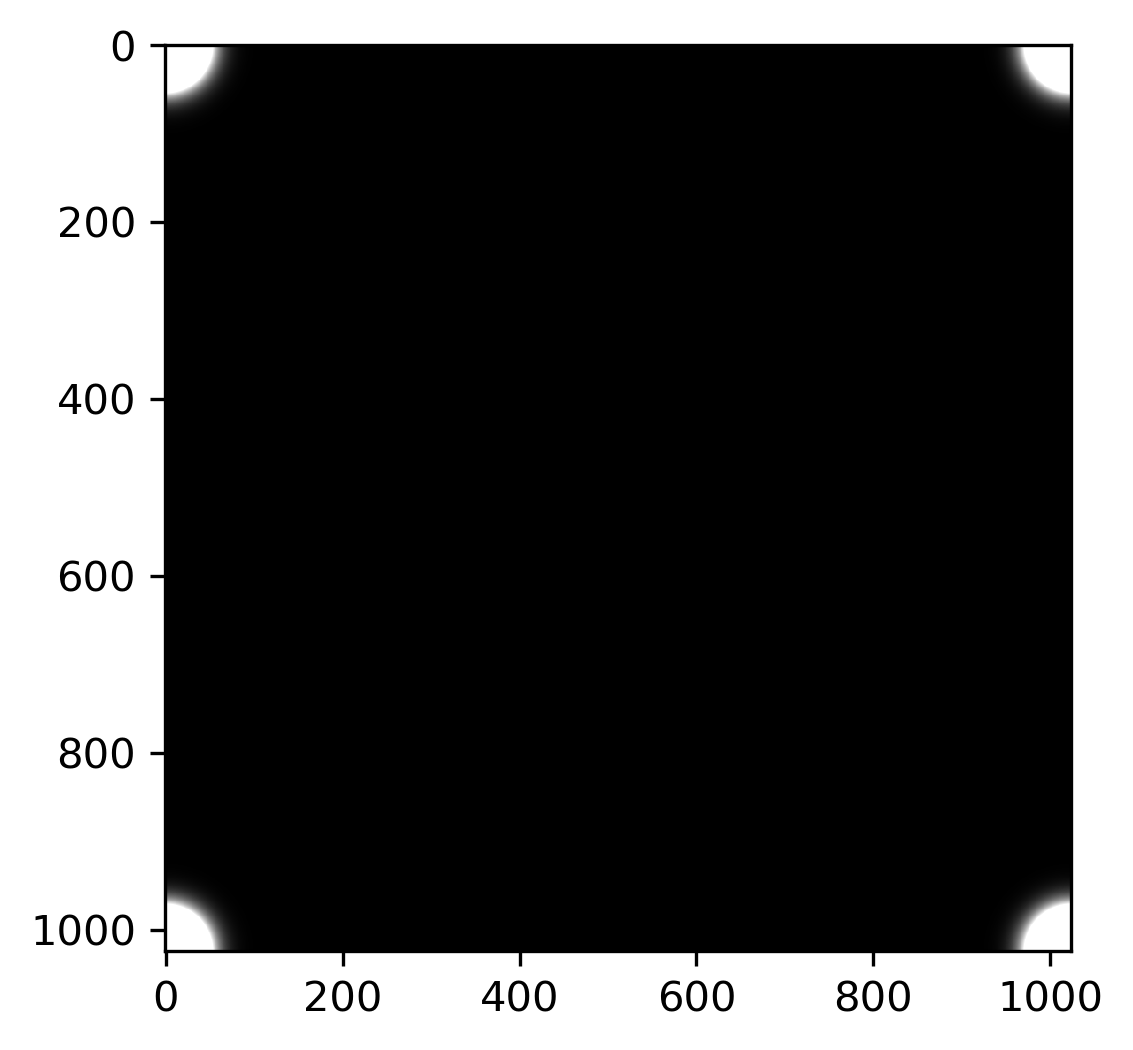

In [15]:
### Part B
sigma = 25

# Get dimensions of photo
K = len(blur[0,:])
L = len(blur[:,0])

# Define PSF Function
def f(x,y):
    
    #Define values for upper right corner
    UR = np.exp(-(x**2+y**2)/2/sigma**2)
    
    #Define values for upper left corner
    UL = np.exp(-((x-K)**2+y**2)/2/sigma**2)
    
    #Define values for lower left corner
    LL = np.exp(-((x**2+(y-L)**2)/2/sigma**2))
    
    #Define values for lower right corner
    LR = np.exp(-(((x-K)**2+(y-L)**2)/2/sigma**2))
    return UR + UL + LL + LR

sigma = 25

# Create PSF 2x2 array
psf = np.zeros((K,L))
for i in range(K):
    for j in range(L):
        psf[i][j] = f(i,j)

plt.figure(dpi=300)
plt.imshow(psf, cmap="gray", vmax = 0.1)
plt.show()

In [19]:
### Part C

# Load image and get dimensions
blur = np.genfromtxt("./Textbook Files/blur.txt")
K = len(blur[0,:])
L = len(blur[:,0])

# Define PSF Function
def f(x,y):
    
    #Define values for upper right corner
    UR = np.exp(-(x**2+y**2)/2/sigma**2)
    
    #Define values for upper left corner
    UL = np.exp(-((x-K)**2+y**2)/2/sigma**2)
    
    #Define values for lower left corner
    LL = np.exp(-((x**2+(y-L)**2)/2/sigma**2))
    
    #Define values for lower right corner
    LR = np.exp(-(((x-K)**2+(y-L)**2)/2/sigma**2))
    return UR + UL + LL + LR

sigma = 25

# Create PSF 2x2 array
psf = np.zeros((K,L))
for i in range(K):
    for j in range(L):
        psf[i][j] += f(i,j)
        

# Take FT of blurred image, psf
B = np.fft.rfft2(blur)
PSF = np.fft.rfft2(psf)

# Divide arrays to get FT of sharpened image, 
# take into account divide by zero erros
eps = 1e-3 
A = np.zeros((K,L//2+1), complex)
for i in range(0, K): 
    for j in range(0, L//2+1): 
        if abs(PSF[i][j]) < eps: 
            A[i][j] = B[i][j] / K / L
        else: 
            A[i][j] = B[i][j] / PSF[i][j] / K / L
            

# inverse FT to get sharpened image
a = np.fft.irfft2(A)

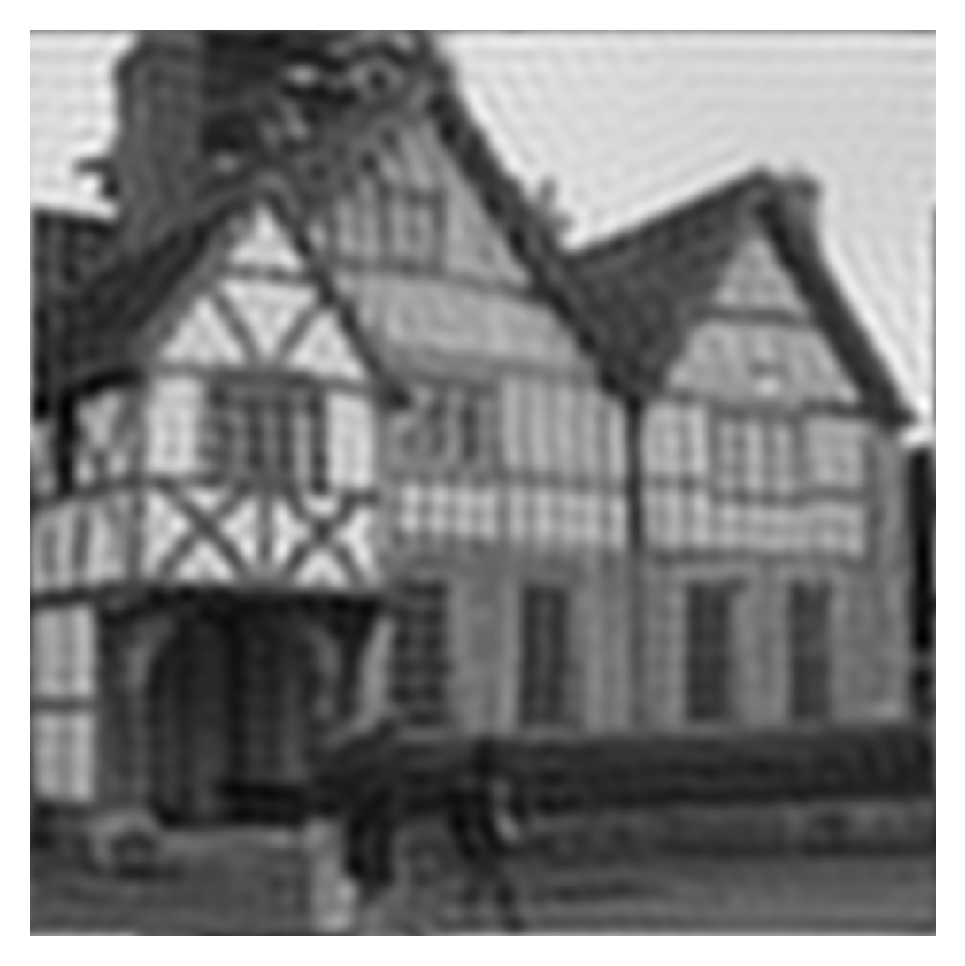

In [20]:
# plt.figure(dpi=300)
# plt.axis("off")
# plt.imshow(blur, cmap="gray")
# plt.show()

# Display Sharpened Image
plt.figure(dpi=300)
plt.axis("off")
plt.imshow(a, cmap="gray")
plt.show()

We cannot perfectly unblur any photo due to the fact that the sharpest parts of the image come from the extremely high frequency parts of the PSF FT.  These parts have values that are very close to zero, and we must leave these out when dividing the blurred image by the PSF.  This leaves us to leave out some sharpening aspects and render imperfect corrections tot the blurred photo